In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.metrics import r2_score
from IPython.display import display

In [64]:
properties = [
    'pH',
    'OM',
    'Ca',
    'Mg',
    'K',
    'Na'
]

models = [
    'RF',
    'LASSO',
    'SVR',
    'PLSR6',    
    'LR',
#     'PLSR2',
]

scalers = [
#     'wo_norm',
    'minmax',
    'standard'
]


satellites = [
#     'landsat_simulated',
#     'landsat_simulated_indices',
#     'sentinel2_simulated',
#     'sentinel2_simulated_indices',
#     'desis_simulated',
#     'sentinel2_soil',
#     'sentinel2_soil_indices',
    'sentinel2_all',
    'sentinel2_all_indices',
#     'vis_nir'
][::-1]

features = [
#     'scE_d1_d2_fft_cr_',
#     'scE_d1_d2_fft_',
    'scE_d1_d2_cr_',
    'scE_d1_d2_',
#     'scE_cr_',
#     'scE_d1_',
#     'scE_d2_',
#     'scE_fft_',
#     'scE_'
]
sns.set_theme(style="whitegrid")


In [65]:
def check_path(path):
    files = path.split('/')
    tmp_path = ''
    
    for file in files:
        tmp_path += f"{file}/"
#         print(tmp_path)
        if not os.path.exists(tmp_path):
            os.mkdir(tmp_path)


def join_results_unpivot_metrics(columns):
    all_df_temp_ = []

    for col in columns:
        col_ = list(df_temp.columns[:5])
        col_.extend([col])
        df_temp_ = df_temp[col_].copy()
        df_temp_['metric'] = col
        df_temp_.rename(columns={col:'result'}, inplace=True) 

        all_df_temp_.append(df_temp_)

    all_df_temp = pd.concat(all_df_temp_).reset_index(drop=True)
    
    return all_df_temp


def read_metrics(scaler, feature, property_):
    find_route = f"../reports/metrics/{scaler}/{feature}"

    df_temp = pd.read_csv(
        f"{find_route}/result_metrics_{property_}.csv",
        sep=';', decimal='.'
    )

    df_temp = df_temp[
        df_temp['Satellite'].isin(satellites) &
        df_temp['Model'].isin(models) &
        df_temp['Property'].isin(properties) &
        df_temp['Features'].isin(features)
    ]
    
    return df_temp


def filter_data(all_df_temp):
    all_df_temp_ = all_df_temp[
        all_df_temp['result'] >= 0
    ].sort_values(by=['result'], ascending=False)

    all_df_temp_2 = all_df_temp[
        all_df_temp['result'] < 0
    ].sort_values(by=['result'], ascending=False)
    
#     print(all_df_temp_[all_df_temp_['metric'] == 'R2 CV All'].shape)
    display(all_df_temp_[all_df_temp_['metric'] == 'R2 CV All'].head(3))
    print(all_df_temp_2.shape)
    display(all_df_temp_2.head(3))
    
    return all_df_temp_

scaler: minmax
feature: scE_d1_d2_cr_
property_: pH


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,minmax,scE_d1_d2_cr_,pH,RF,0.195,R2 CV All
11,sentinel2_all,minmax,scE_d1_d2_cr_,pH,RF,0.194,R2 CV All
12,sentinel2_all_indices,minmax,scE_d1_d2_cr_,pH,LASSO,0.122,R2 CV All


(5, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
15,sentinel2_all_indices,minmax,scE_d1_d2_cr_,pH,SVR,-0.001,R2 CV All
16,sentinel2_all,minmax,scE_d1_d2_cr_,pH,LASSO,-0.007,R2 CV All
17,sentinel2_all,minmax,scE_d1_d2_cr_,pH,PLSR6,-0.023,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_pH_Model.png


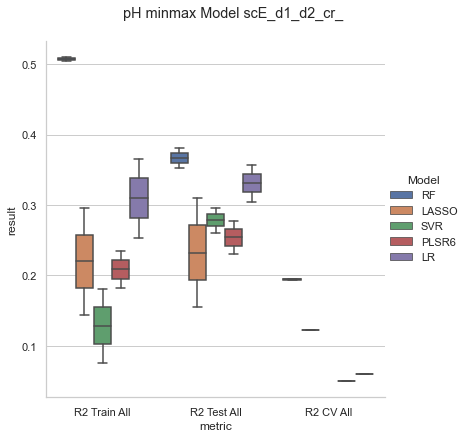

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_pH_Satellite.png


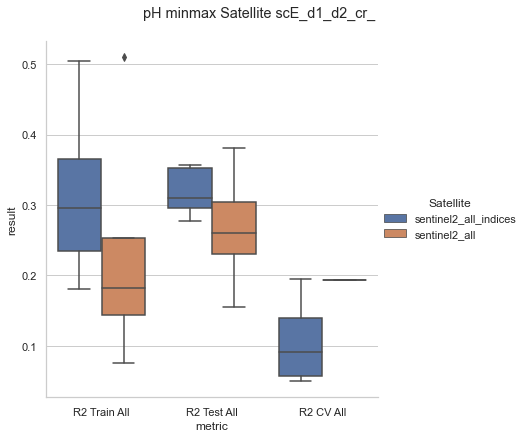

property_: OM


,Satellite,Scaler,Features,Property,Model,result,metric


(20, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
20,sentinel2_all_indices,minmax,scE_d1_d2_cr_,OM,LASSO,-0.072,R2 Test All
21,sentinel2_all,minmax,scE_d1_d2_cr_,OM,LASSO,-0.072,R2 Test All
10,sentinel2_all_indices,minmax,scE_d1_d2_cr_,OM,LASSO,-0.079,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_OM_Model.png


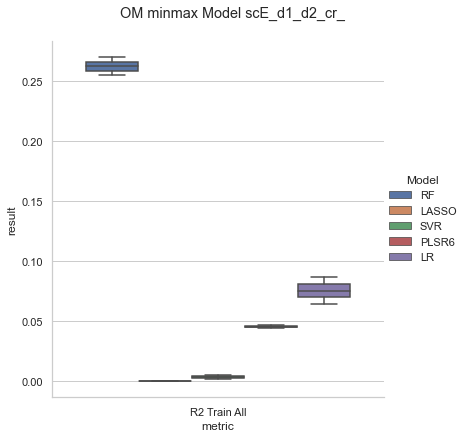

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_OM_Satellite.png


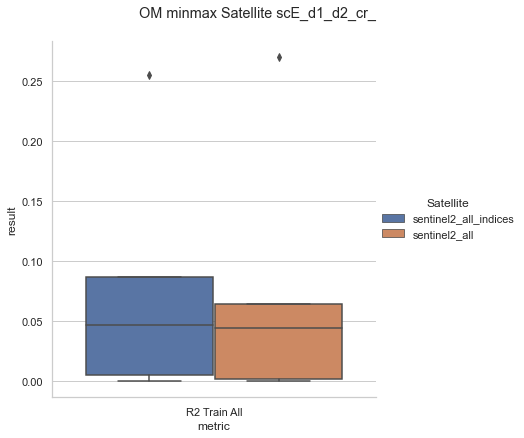

property_: Ca


,Satellite,Scaler,Features,Property,Model,result,metric


(13, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
0,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Ca,SVR,-0.019,R2 Train All
23,sentinel2_all,minmax,scE_d1_d2_cr_,Ca,SVR,-0.072,R2 Test All
10,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Ca,SVR,-0.098,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_Ca_Model.png


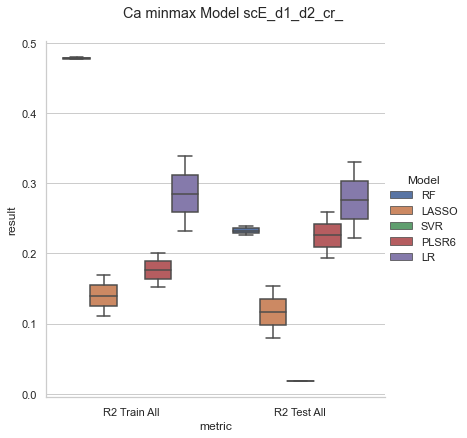

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_Ca_Satellite.png


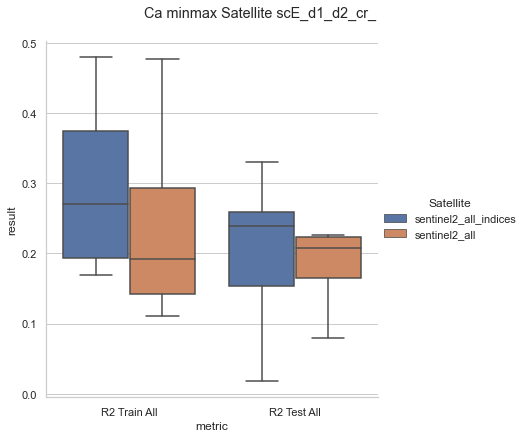

property_: Mg


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Mg,LASSO,0.092,R2 CV All
11,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Mg,RF,0.077,R2 CV All
12,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Mg,LR,0.071,R2 CV All


(4, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
16,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Mg,SVR,-0.022,R2 CV All
17,sentinel2_all,minmax,scE_d1_d2_cr_,Mg,LASSO,-0.035,R2 CV All
18,sentinel2_all,minmax,scE_d1_d2_cr_,Mg,PLSR6,-0.036,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_Mg_Model.png


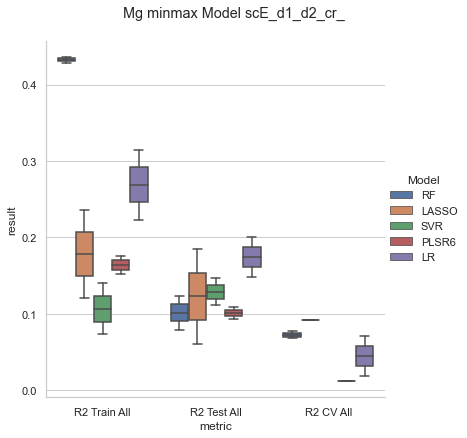

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_Mg_Satellite.png


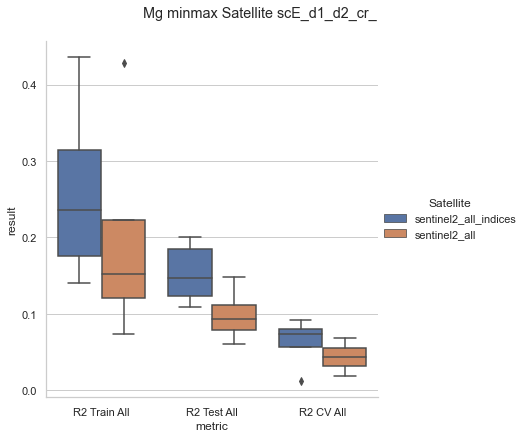

property_: K


,Satellite,Scaler,Features,Property,Model,result,metric


(17, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
22,sentinel2_all,minmax,scE_d1_d2_cr_,K,RF,-0.018,R2 Test All
23,sentinel2_all_indices,minmax,scE_d1_d2_cr_,K,RF,-0.019,R2 Test All
10,sentinel2_all,minmax,scE_d1_d2_cr_,K,SVR,-0.024,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_K_Model.png


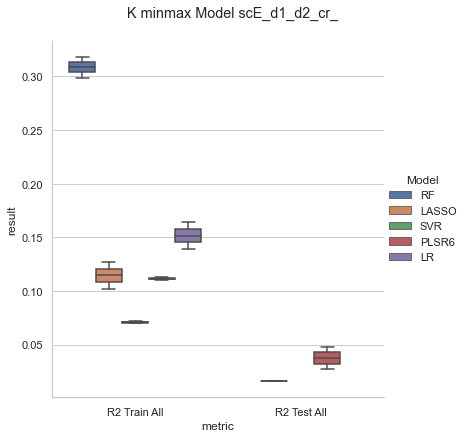

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_K_Satellite.png


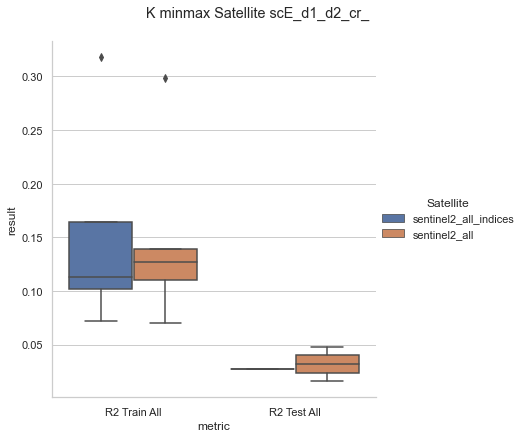

property_: Na


,Satellite,Scaler,Features,Property,Model,result,metric


(15, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
22,sentinel2_all,minmax,scE_d1_d2_cr_,Na,LASSO,-0.005,R2 Test All
23,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Na,LASSO,-0.005,R2 Test All
21,sentinel2_all_indices,minmax,scE_d1_d2_cr_,Na,SVR,-0.006,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_Na_Model.png


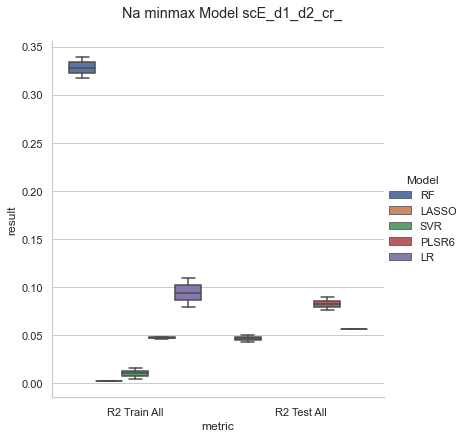

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_cr_/results_as_boxplots_for_Na_Satellite.png


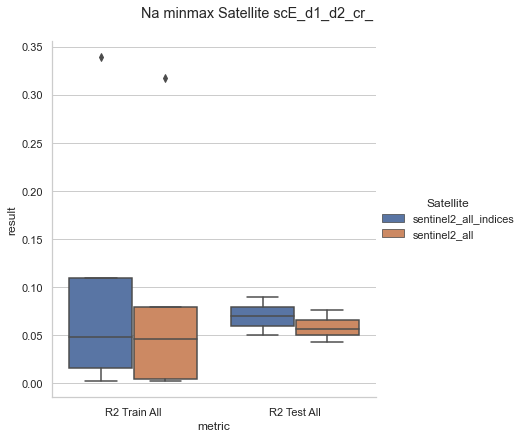

feature: scE_d1_d2_
property_: pH


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,minmax,scE_d1_d2_,pH,RF,0.193,R2 CV All
11,sentinel2_all,minmax,scE_d1_d2_,pH,RF,0.189,R2 CV All
12,sentinel2_all_indices,minmax,scE_d1_d2_,pH,LASSO,0.081,R2 CV All


(5, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
15,sentinel2_all_indices,minmax,scE_d1_d2_,pH,SVR,-0.008,R2 CV All
16,sentinel2_all,minmax,scE_d1_d2_,pH,LASSO,-0.051,R2 CV All
17,sentinel2_all,minmax,scE_d1_d2_,pH,SVR,-0.075,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_pH_Model.png


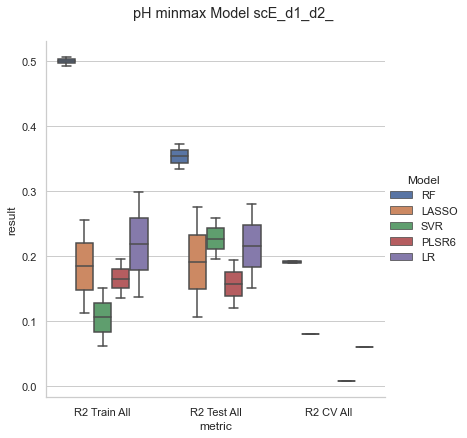

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_pH_Satellite.png


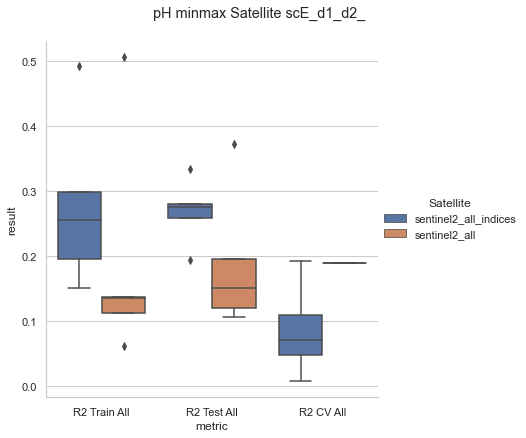

property_: OM


,Satellite,Scaler,Features,Property,Model,result,metric


(22, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
6,sentinel2_all_indices,minmax,scE_d1_d2_,OM,SVR,-0.017,R2 Train All
4,sentinel2_all,minmax,scE_d1_d2_,OM,SVR,-0.018,R2 Train All
20,sentinel2_all_indices,minmax,scE_d1_d2_,OM,LASSO,-0.072,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_OM_Model.png


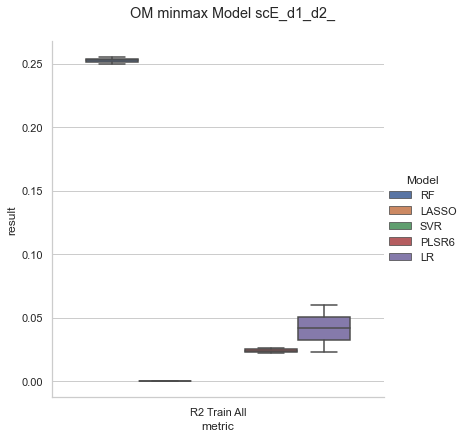

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_OM_Satellite.png


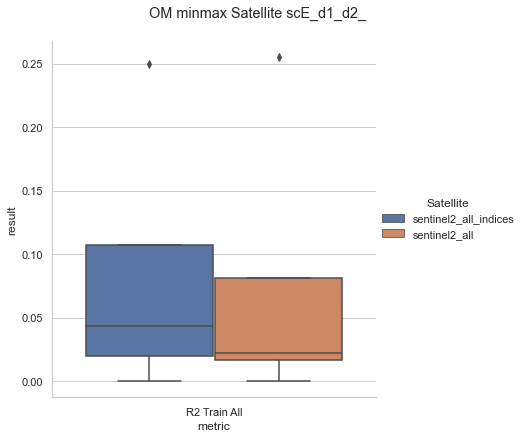

property_: Ca


,Satellite,Scaler,Features,Property,Model,result,metric


(14, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
22,sentinel2_all_indices,minmax,scE_d1_d2_,Ca,SVR,-0.019,R2 Test All
2,sentinel2_all_indices,minmax,scE_d1_d2_,Ca,SVR,-0.070,R2 Train All
10,sentinel2_all_indices,minmax,scE_d1_d2_,Ca,RF,-0.100,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_Ca_Model.png


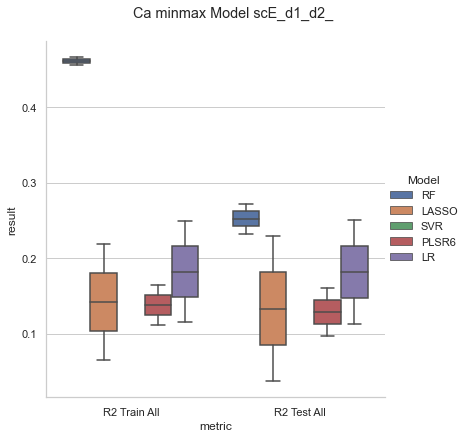

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_Ca_Satellite.png


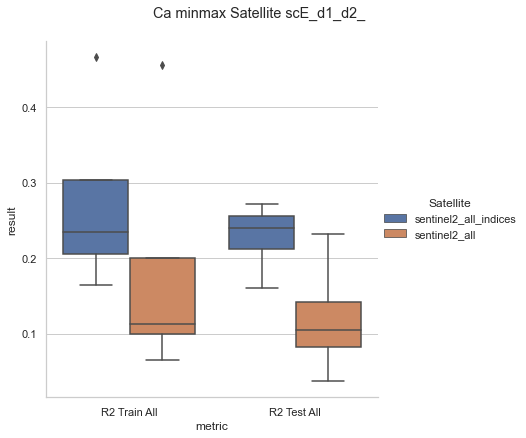

property_: Mg


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,minmax,scE_d1_d2_,Mg,RF,0.092,R2 CV All
11,sentinel2_all,minmax,scE_d1_d2_,Mg,RF,0.082,R2 CV All
12,sentinel2_all_indices,minmax,scE_d1_d2_,Mg,LR,0.027,R2 CV All


(5, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
15,sentinel2_all_indices,minmax,scE_d1_d2_,Mg,SVR,-0.009,R2 CV All
16,sentinel2_all,minmax,scE_d1_d2_,Mg,LASSO,-0.034,R2 CV All
17,sentinel2_all,minmax,scE_d1_d2_,Mg,PLSR6,-0.054,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_Mg_Model.png


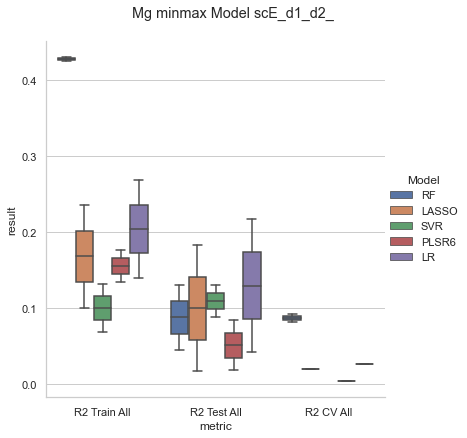

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_Mg_Satellite.png


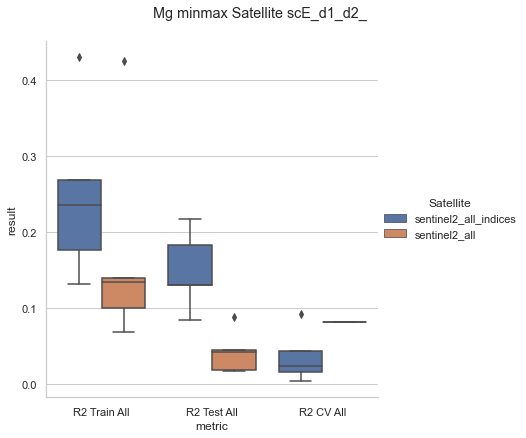

property_: K


,Satellite,Scaler,Features,Property,Model,result,metric


(18, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
23,sentinel2_all_indices,minmax,scE_d1_d2_,K,PLSR6,-0.003,R2 Test All
10,sentinel2_all,minmax,scE_d1_d2_,K,SVR,-0.020,R2 CV All
21,sentinel2_all_indices,minmax,scE_d1_d2_,K,LASSO,-0.030,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_K_Model.png


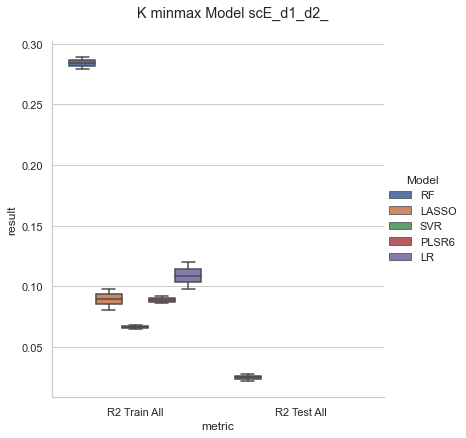

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_K_Satellite.png


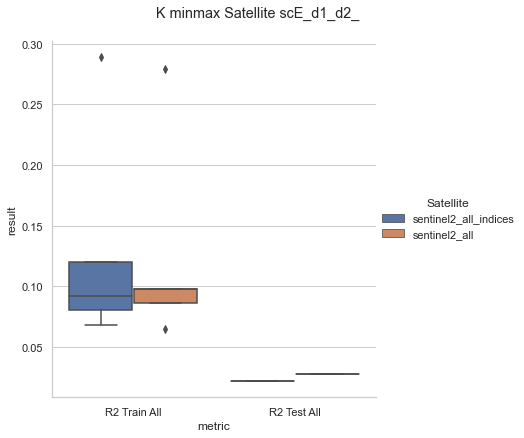

property_: Na


,Satellite,Scaler,Features,Property,Model,result,metric


(17, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
23,sentinel2_all,minmax,scE_d1_d2_,Na,LR,-0.002,R2 Test All
1,sentinel2_all,minmax,scE_d1_d2_,Na,SVR,-0.003,R2 Train All
25,sentinel2_all_indices,minmax,scE_d1_d2_,Na,LASSO,-0.007,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_Na_Model.png


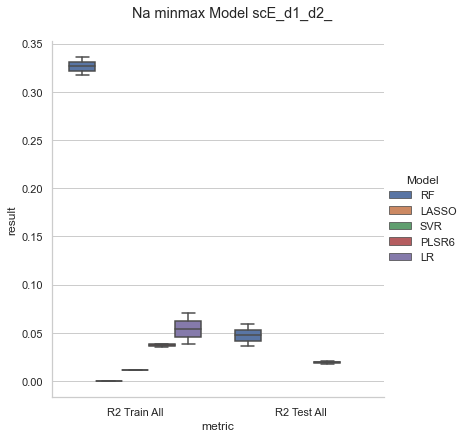

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_/results_as_boxplots_for_Na_Satellite.png


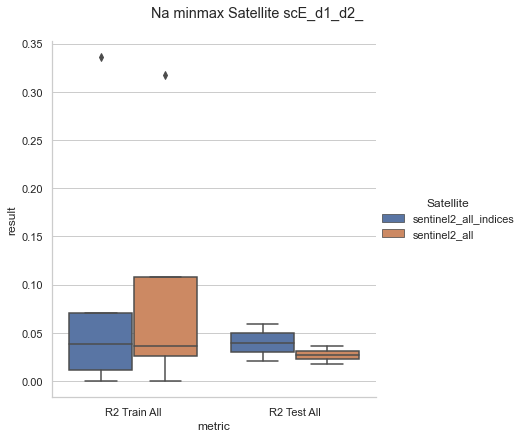

scaler: standard
feature: scE_d1_d2_cr_
property_: pH


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all,standard,scE_d1_d2_cr_,pH,RF,0.186,R2 CV All
11,sentinel2_all_indices,standard,scE_d1_d2_cr_,pH,RF,0.181,R2 CV All
12,sentinel2_all_indices,standard,scE_d1_d2_cr_,pH,LASSO,0.102,R2 CV All


(5, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
15,sentinel2_all,standard,scE_d1_d2_cr_,pH,LASSO,-0.006,R2 CV All
16,sentinel2_all,standard,scE_d1_d2_cr_,pH,LR,-0.020,R2 CV All
17,sentinel2_all,standard,scE_d1_d2_cr_,pH,PLSR6,-0.023,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_pH_Model.png


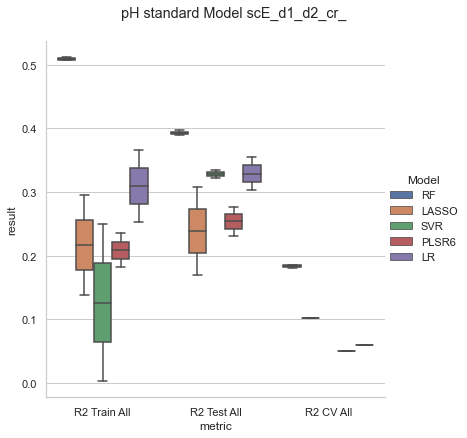

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_pH_Satellite.png


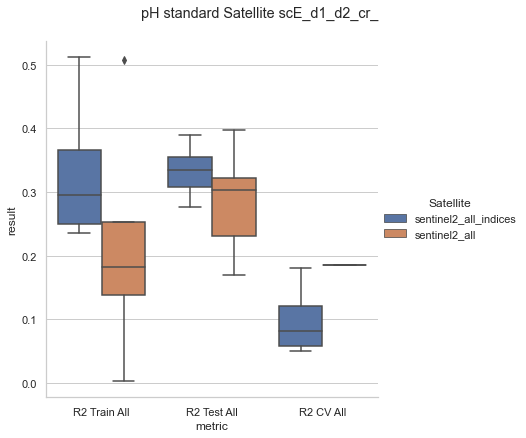

property_: OM


,Satellite,Scaler,Features,Property,Model,result,metric


(20, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
20,sentinel2_all_indices,standard,scE_d1_d2_cr_,OM,LASSO,-0.072,R2 Test All
21,sentinel2_all,standard,scE_d1_d2_cr_,OM,LASSO,-0.072,R2 Test All
10,sentinel2_all_indices,standard,scE_d1_d2_cr_,OM,LASSO,-0.086,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_OM_Model.png


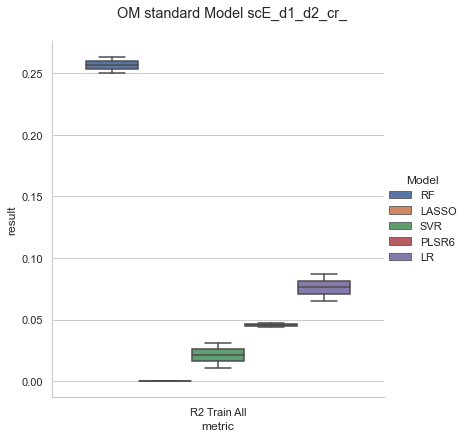

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_OM_Satellite.png


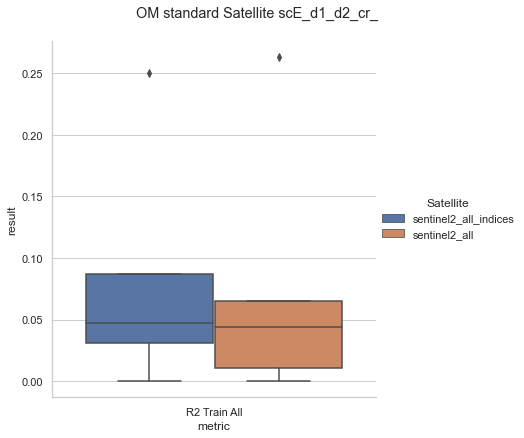

property_: Ca


,Satellite,Scaler,Features,Property,Model,result,metric


(10, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,standard,scE_d1_d2_cr_,Ca,RF,-0.096,R2 CV All
11,sentinel2_all,standard,scE_d1_d2_cr_,Ca,RF,-0.122,R2 CV All
12,sentinel2_all_indices,standard,scE_d1_d2_cr_,Ca,LASSO,-0.179,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_Ca_Model.png


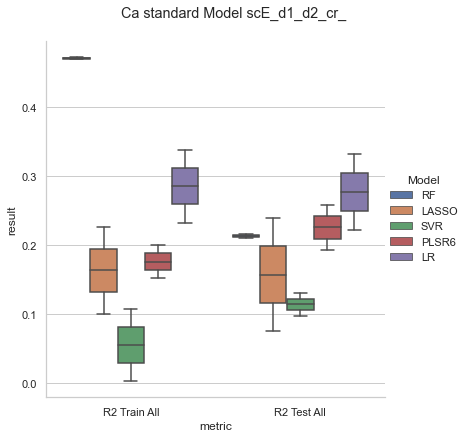

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_Ca_Satellite.png


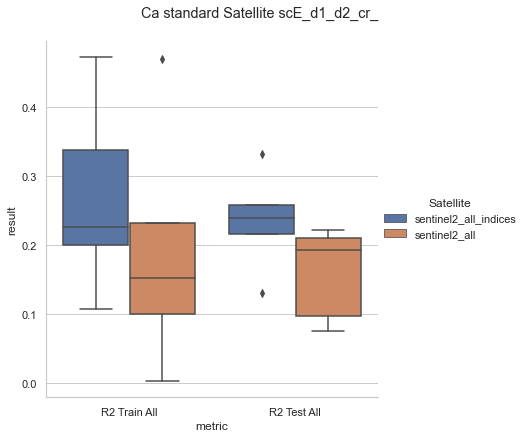

property_: Mg


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,standard,scE_d1_d2_cr_,Mg,RF,0.081,R2 CV All
11,sentinel2_all_indices,standard,scE_d1_d2_cr_,Mg,LR,0.070,R2 CV All
12,sentinel2_all,standard,scE_d1_d2_cr_,Mg,RF,0.068,R2 CV All


(3, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
17,sentinel2_all,standard,scE_d1_d2_cr_,Mg,LASSO,-0.032,R2 CV All
18,sentinel2_all,standard,scE_d1_d2_cr_,Mg,PLSR6,-0.036,R2 CV All
19,sentinel2_all,standard,scE_d1_d2_cr_,Mg,SVR,-0.157,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_Mg_Model.png


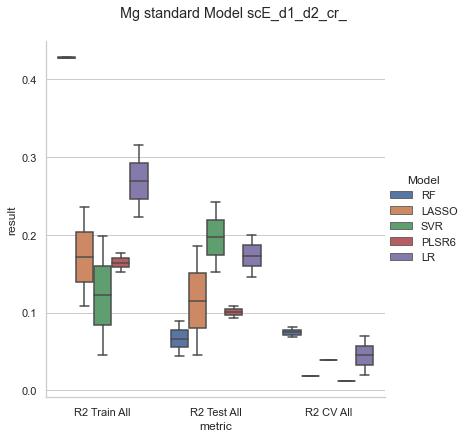

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_Mg_Satellite.png


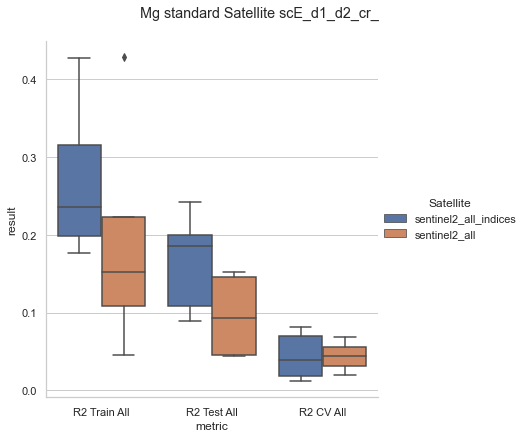

property_: K


,Satellite,Scaler,Features,Property,Model,result,metric


(18, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
26,sentinel2_all,standard,scE_d1_d2_cr_,K,LR,-0.009,R2 Test All
23,sentinel2_all,standard,scE_d1_d2_cr_,K,LASSO,-0.009,R2 Test All
10,sentinel2_all,standard,scE_d1_d2_cr_,K,SVR,-0.022,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_K_Model.png


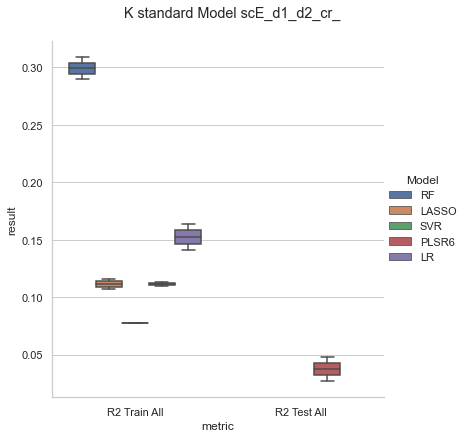

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_K_Satellite.png


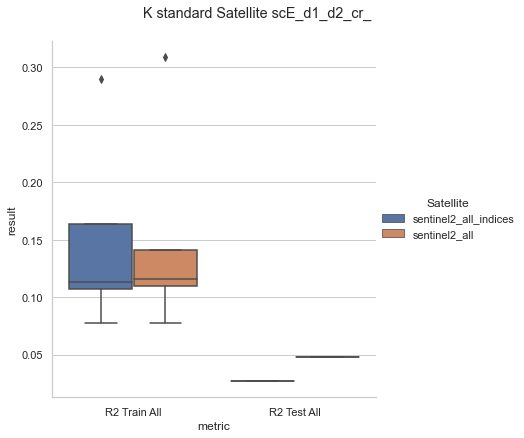

property_: Na


,Satellite,Scaler,Features,Property,Model,result,metric


(13, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
23,sentinel2_all_indices,standard,scE_d1_d2_cr_,Na,LASSO,-0.003,R2 Test All
21,sentinel2_all_indices,standard,scE_d1_d2_cr_,Na,SVR,-0.008,R2 Test All
29,sentinel2_all_indices,standard,scE_d1_d2_cr_,Na,LR,-0.026,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_Na_Model.png


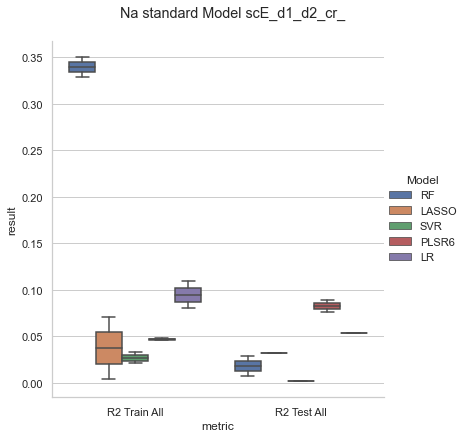

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_cr_/results_as_boxplots_for_Na_Satellite.png


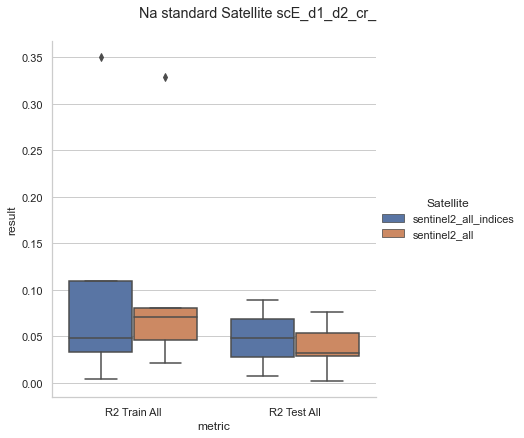

feature: scE_d1_d2_
property_: pH


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,standard,scE_d1_d2_,pH,RF,0.187,R2 CV All
11,sentinel2_all,standard,scE_d1_d2_,pH,RF,0.183,R2 CV All
12,sentinel2_all_indices,standard,scE_d1_d2_,pH,LASSO,0.077,R2 CV All


(6, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
9,sentinel2_all,standard,scE_d1_d2_,pH,SVR,-0.037,R2 Train All
15,sentinel2_all_indices,standard,scE_d1_d2_,pH,SVR,-0.061,R2 CV All
16,sentinel2_all,standard,scE_d1_d2_,pH,LASSO,-0.074,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_pH_Model.png


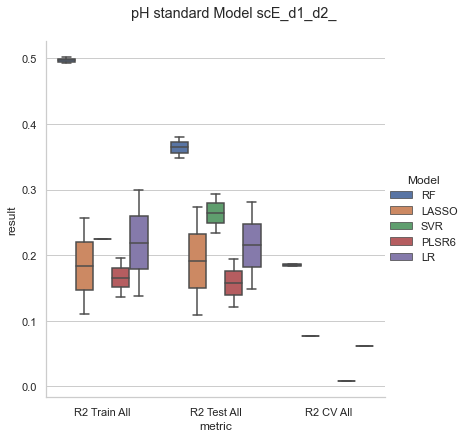

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_pH_Satellite.png


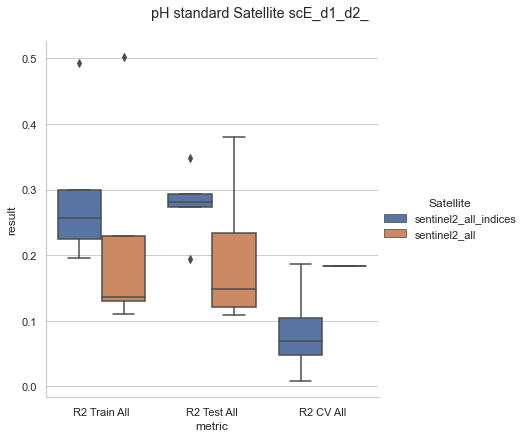

property_: OM


,Satellite,Scaler,Features,Property,Model,result,metric


(21, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
7,sentinel2_all,standard,scE_d1_d2_,OM,SVR,-0.009,R2 Train All
21,sentinel2_all_indices,standard,scE_d1_d2_,OM,LASSO,-0.072,R2 Test All
20,sentinel2_all,standard,scE_d1_d2_,OM,LASSO,-0.072,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_OM_Model.png


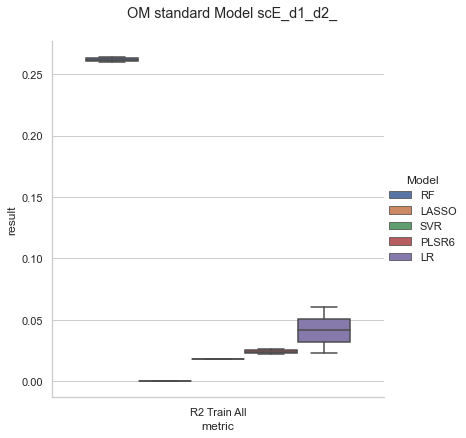

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_OM_Satellite.png


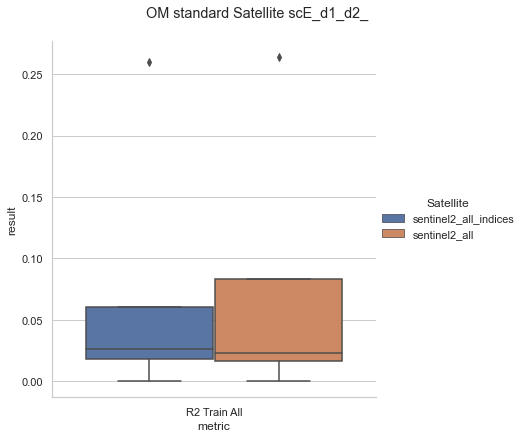

property_: Ca


,Satellite,Scaler,Features,Property,Model,result,metric


(11, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
6,sentinel2_all,standard,scE_d1_d2_,Ca,SVR,-0.019,R2 Train All
10,sentinel2_all_indices,standard,scE_d1_d2_,Ca,RF,-0.102,R2 CV All
11,sentinel2_all,standard,scE_d1_d2_,Ca,RF,-0.106,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_Ca_Model.png


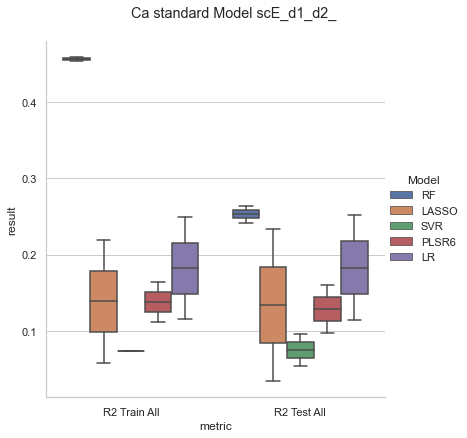

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_Ca_Satellite.png


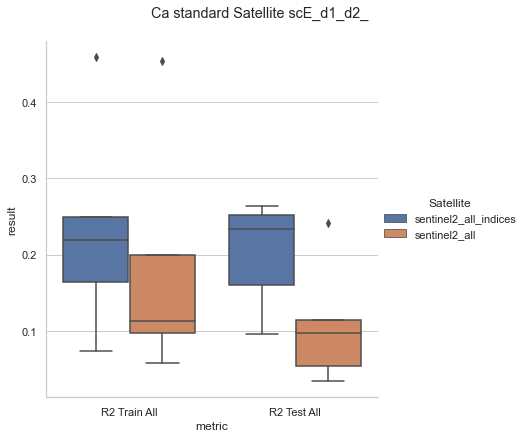

property_: Mg


,Satellite,Scaler,Features,Property,Model,result,metric
10,sentinel2_all_indices,standard,scE_d1_d2_,Mg,RF,0.099,R2 CV All
11,sentinel2_all,standard,scE_d1_d2_,Mg,RF,0.079,R2 CV All
12,sentinel2_all_indices,standard,scE_d1_d2_,Mg,SVR,0.055,R2 CV All


(4, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
16,sentinel2_all,standard,scE_d1_d2_,Mg,LASSO,-0.053,R2 CV All
17,sentinel2_all,standard,scE_d1_d2_,Mg,PLSR6,-0.054,R2 CV All
18,sentinel2_all,standard,scE_d1_d2_,Mg,LR,-0.058,R2 CV All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_Mg_Model.png


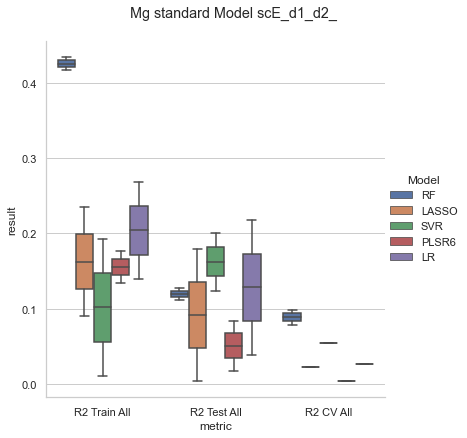

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_Mg_Satellite.png


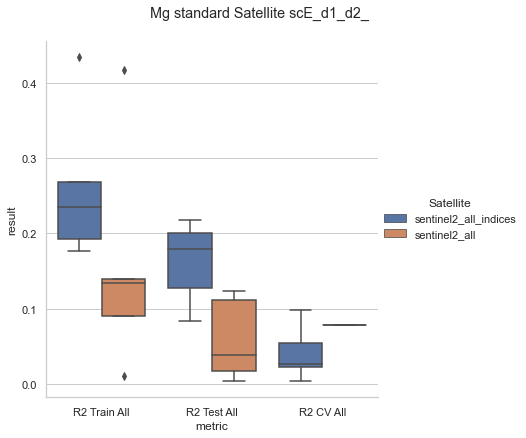

property_: K


,Satellite,Scaler,Features,Property,Model,result,metric


(18, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
22,sentinel2_all_indices,standard,scE_d1_d2_,K,PLSR6,-0.003,R2 Test All
10,sentinel2_all,standard,scE_d1_d2_,K,SVR,-0.020,R2 CV All
23,sentinel2_all_indices,standard,scE_d1_d2_,K,LASSO,-0.027,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_K_Model.png


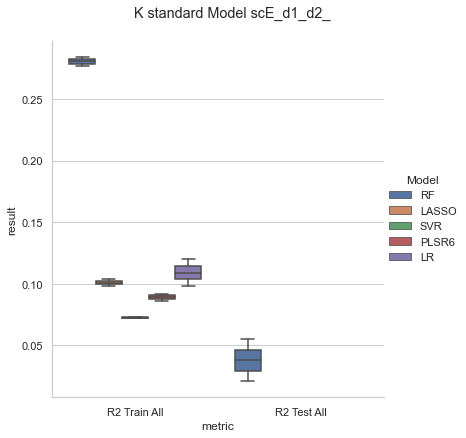

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_K_Satellite.png


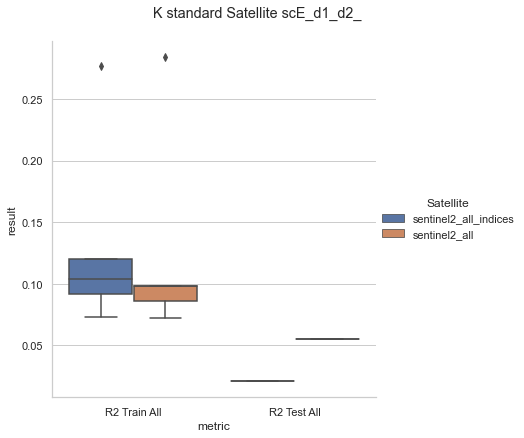

property_: Na


,Satellite,Scaler,Features,Property,Model,result,metric


(17, 7)


,Satellite,Scaler,Features,Property,Model,result,metric
0,sentinel2_all,standard,scE_d1_d2_,Na,SVR,-0.003,R2 Train All
25,sentinel2_all,standard,scE_d1_d2_,Na,LASSO,-0.007,R2 Test All
24,sentinel2_all_indices,standard,scE_d1_d2_,Na,LASSO,-0.007,R2 Test All


../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_Na_Model.png


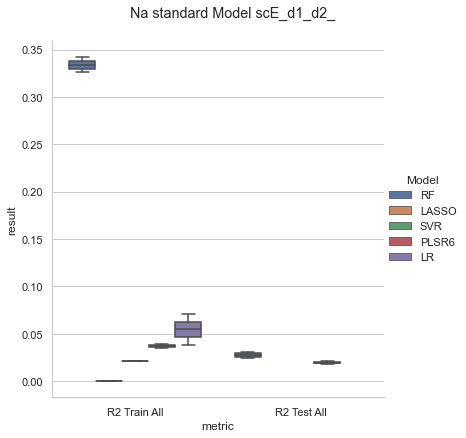

../reports/figures/r2_train_all_r2_cv_all_r2_test_all/standard/scE_d1_d2_/results_as_boxplots_for_Na_Satellite.png


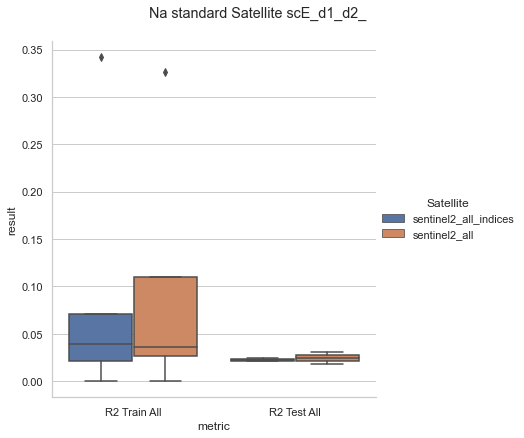

In [66]:
columns_ = [
#     ['CC Train All', 'CC Test All'],
#     ['MSE Train All', 'MSE CV All', 'MSE Test All'],
    ['R2 Train All', 'R2 CV All', 'R2 Test All'],
#     ['EV Train All', 'EV CV All', 'EV Test All']
]
all_text_columns = []

for columns in columns_:
    text_col = "_".join([i.replace(' ', '_') for i in columns]).lower()
    all_text_columns.append(text_col)
    for scaler in scalers:
        print(f"scaler: {scaler}")

        for feature in features:
            print(f"feature: {feature}")

            for property_ in properties:
                print(f"property_: {property_}")

                df_temp = read_metrics(scaler, feature, property_)
                all_df_temp = join_results_unpivot_metrics(columns)
                all_df_temp_ = filter_data(all_df_temp)

                for i in ['Model', 'Satellite']:
                    ax = sns.catplot(
                        x="metric", y="result", hue=i,
                        data=all_df_temp_, kind="box",
                        height=6, aspect=.9,
                        hue_order=satellites if i == 'Satellite' else models
                    )

                    find_route = f"../reports/figures/{text_col}/{scaler}/{feature}"
                    check_path(find_route)

                    ax.fig.subplots_adjust(top=0.9)
                    ax.fig.suptitle(f"{property_} {scaler} {i} {feature}")
#                     ax.savefig(f"{find_route}/results_as_boxplots_for_{property_}_{i.lower()}s.png")
                    print(f"{find_route}/results_as_boxplots_for_{property_}_{i}.png")
                    plt.show(ax)


In [57]:
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [58]:
ls "../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_"

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: CAD2-CEC1

 Directorio de C:\Users\camil\codes\backup_tesis\tesis\reports\figures\r2_train_all_r2_cv_all_r2_test_all\minmax\scE_d1_d2_

02/06/2021  07:45 p.ÿm.    <DIR>          .
02/06/2021  07:45 p.ÿm.    <DIR>          ..
05/06/2021  12:36 a.ÿm.            19.148 results_as_boxplots_for_Ca_models.png
05/06/2021  12:36 a.ÿm.            26.481 results_as_boxplots_for_Ca_satellites.png
05/06/2021  12:36 a.ÿm.            16.929 results_as_boxplots_for_K_models.png
05/06/2021  12:36 a.ÿm.            24.459 results_as_boxplots_for_K_satellites.png
05/06/2021  12:36 a.ÿm.            18.330 results_as_boxplots_for_Mg_models.png
05/06/2021  12:36 a.ÿm.            26.005 results_as_boxplots_for_Mg_satellites.png
05/06/2021  12:36 a.ÿm.            16.215 results_as_boxplots_for_Na_models.png
05/06/2021  12:36 a.ÿm.            23.184 results_as_boxplots_for_Na_satellites.png
05/06/2021  12:36 a.ÿm.            19.324 resul

In [59]:
all_text_columns

['r2_train_all_r2_cv_all_r2_test_all']

In [60]:
all_metrics = [
#     'correlation_coefficient',
#     'MSE',
    'R2',
#     'explain_variance'
]

r2_train_all_r2_cv_all_r2_test_all
R2


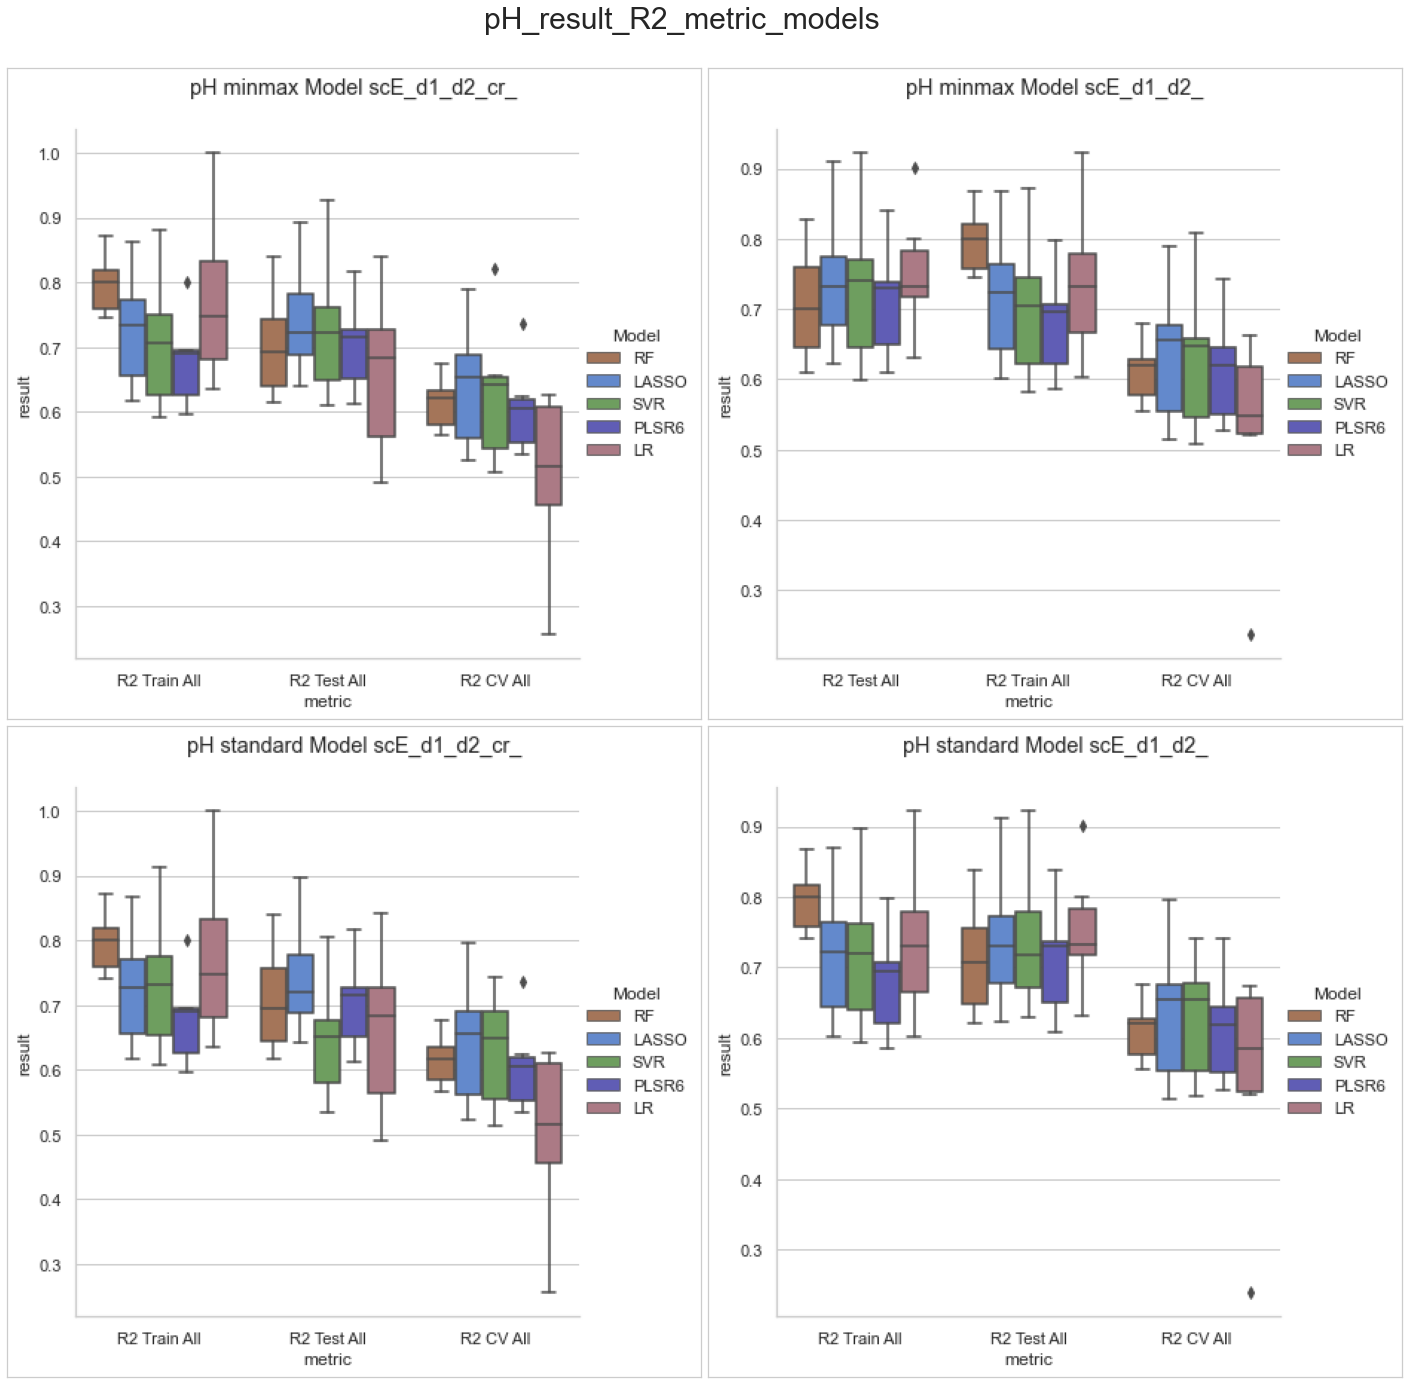

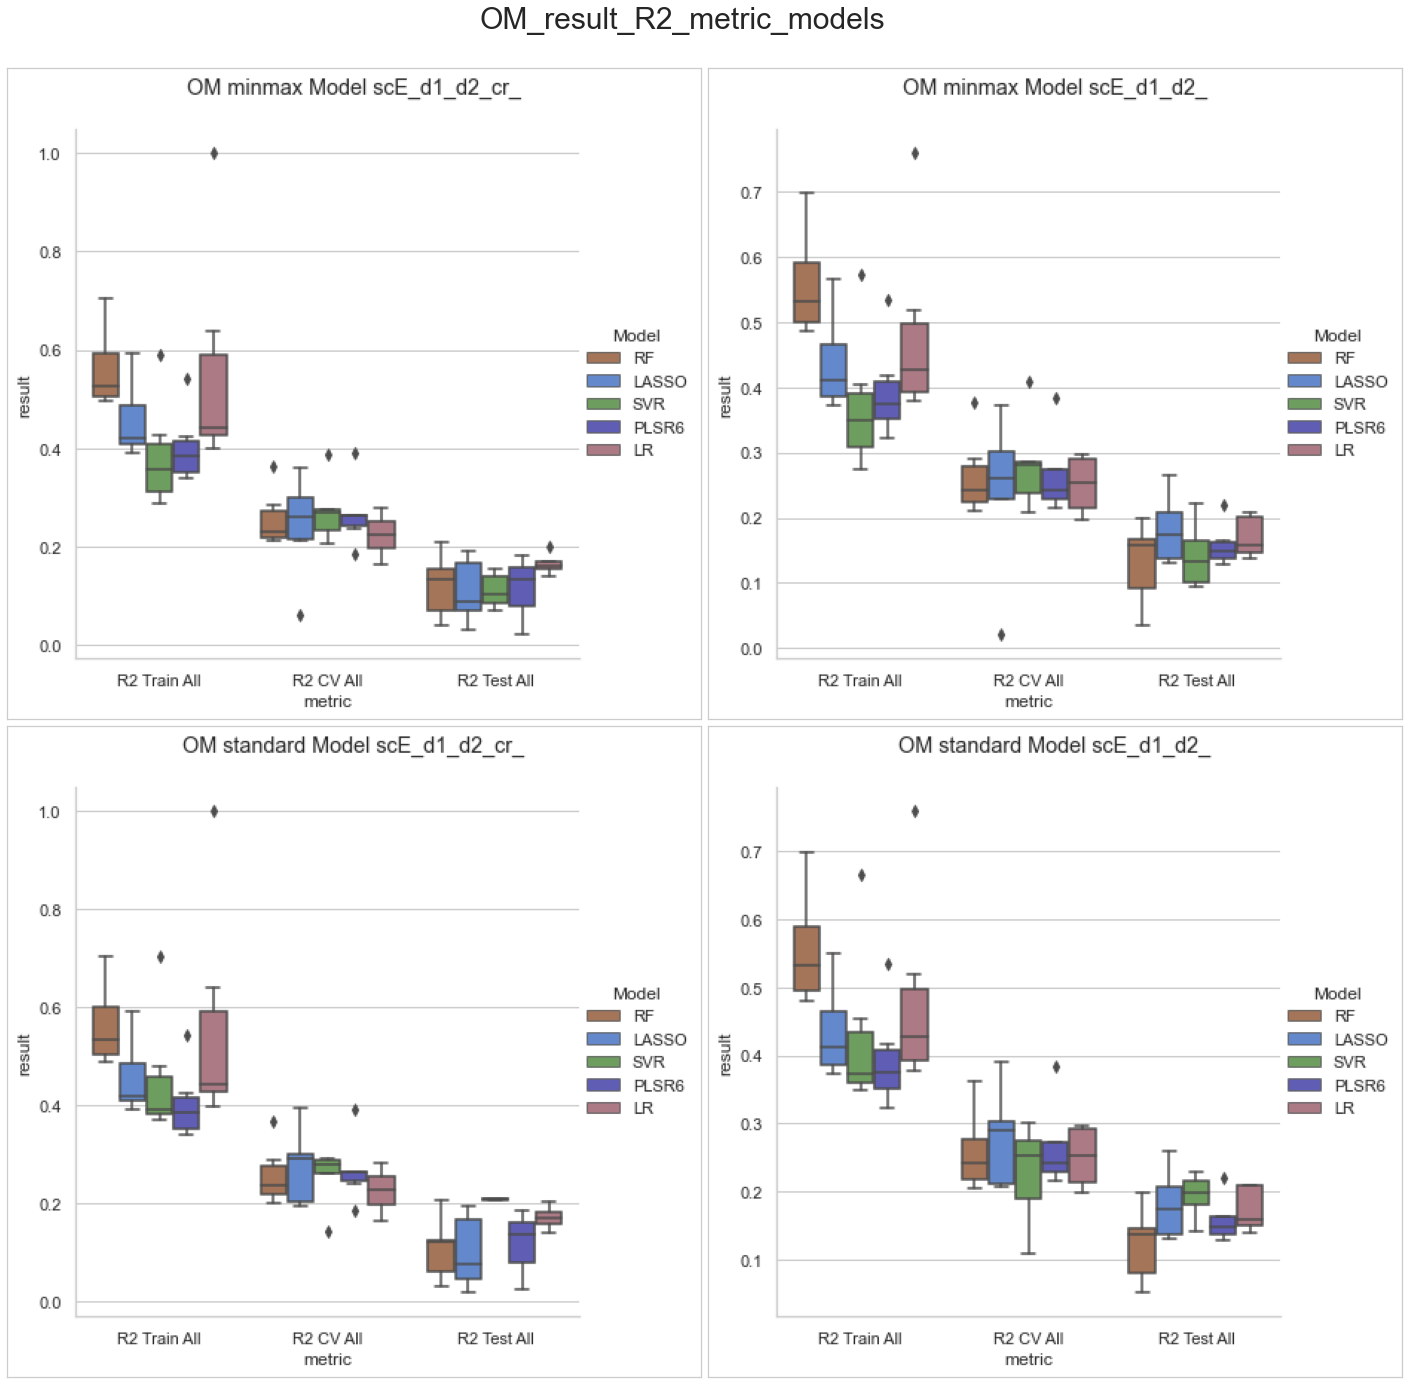

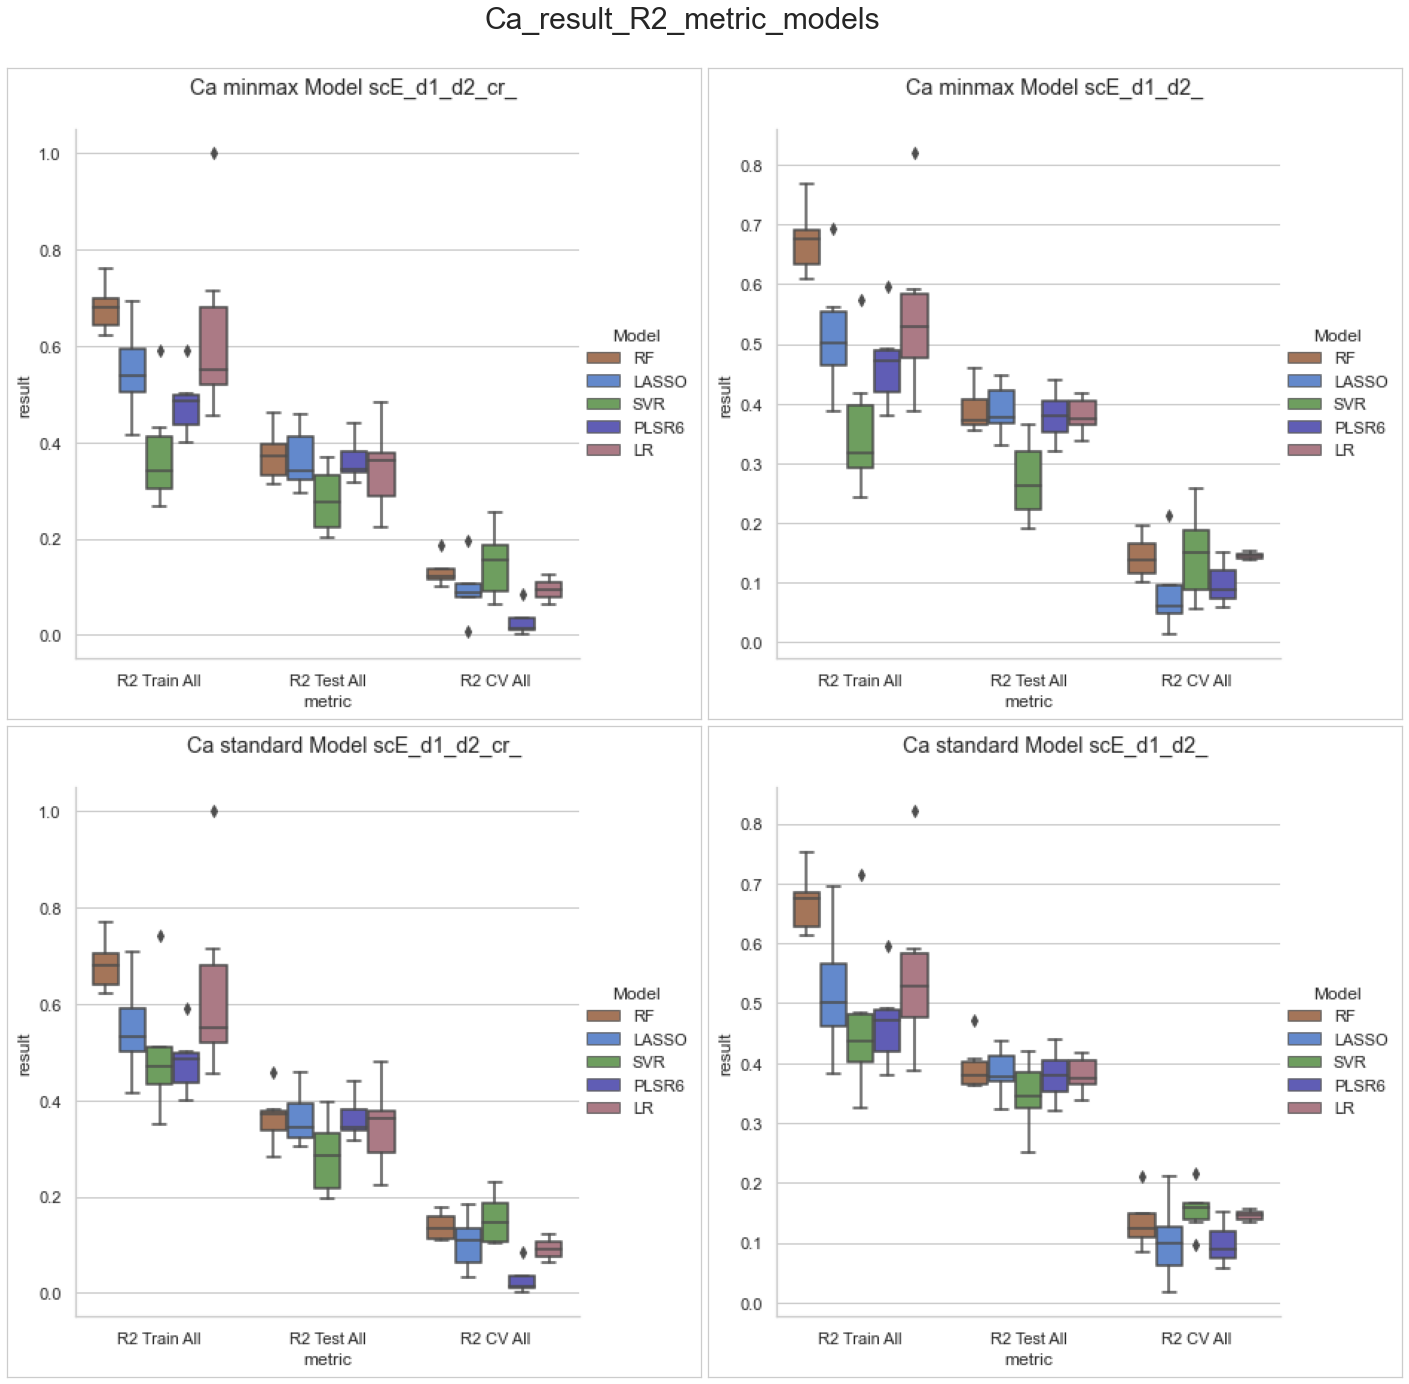

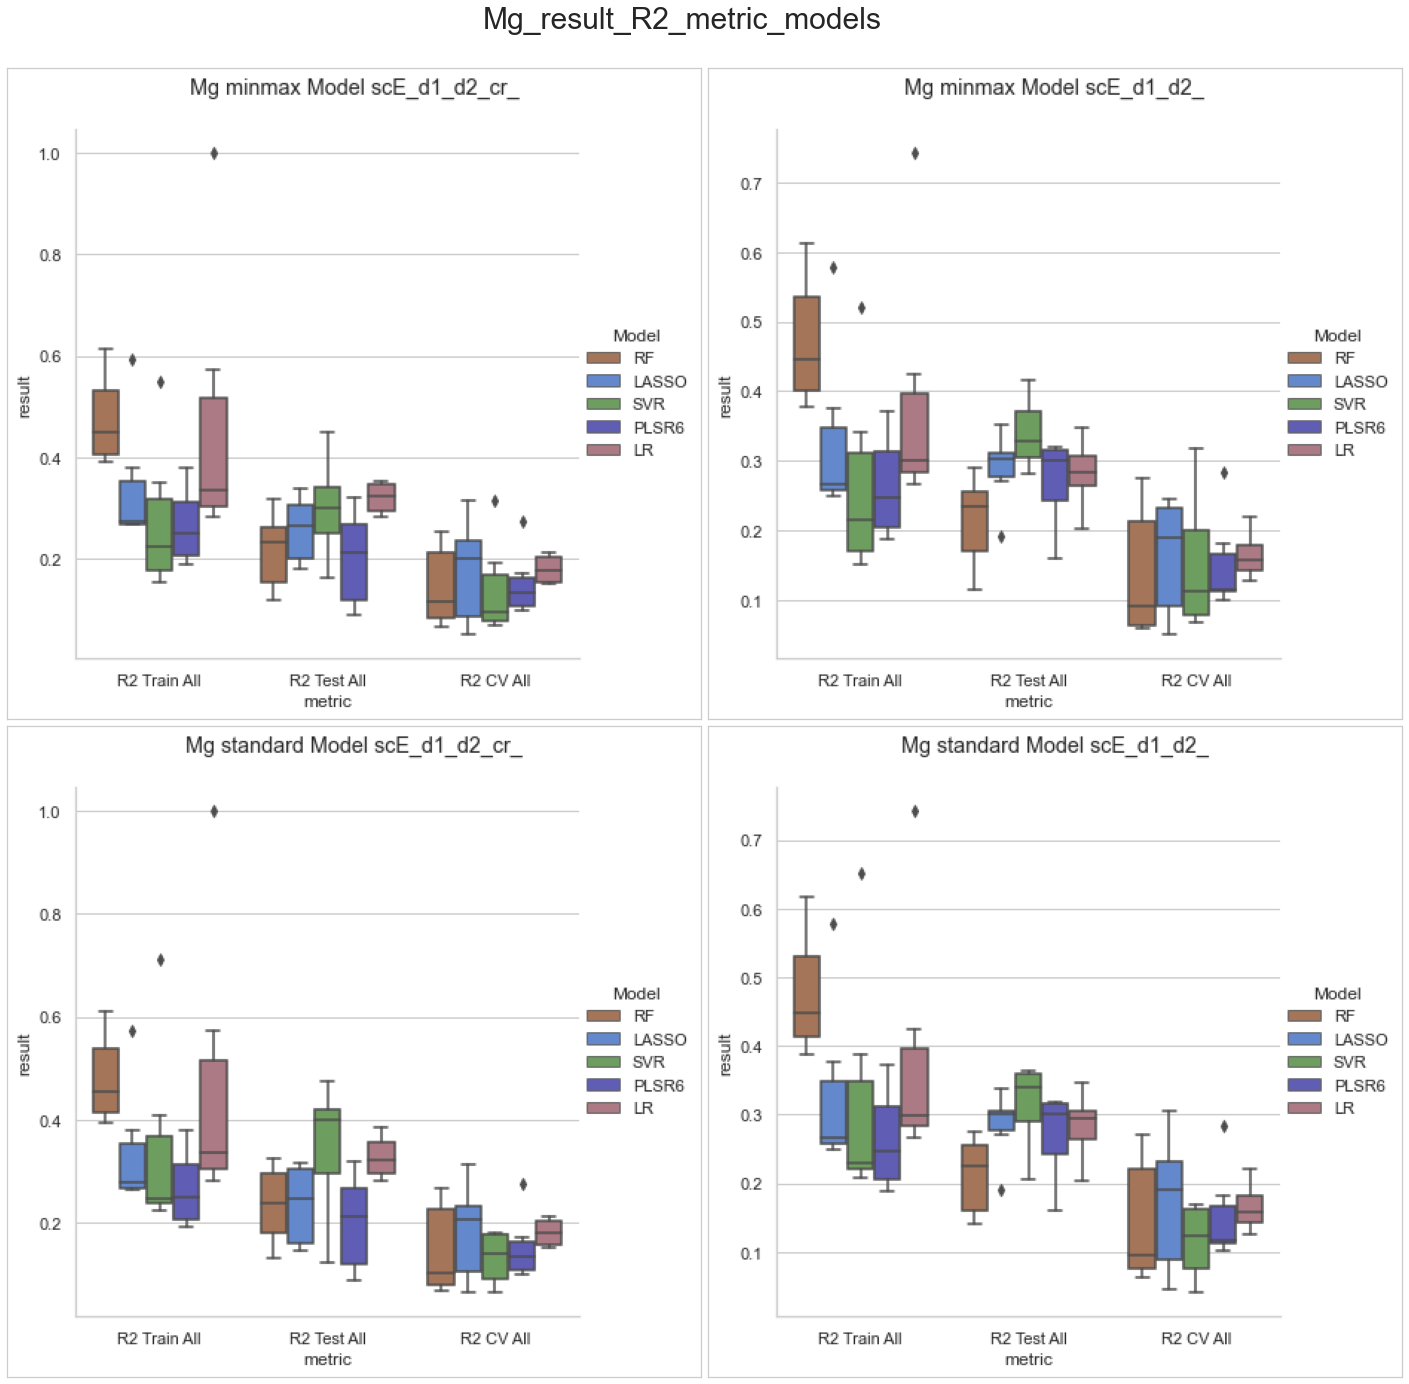

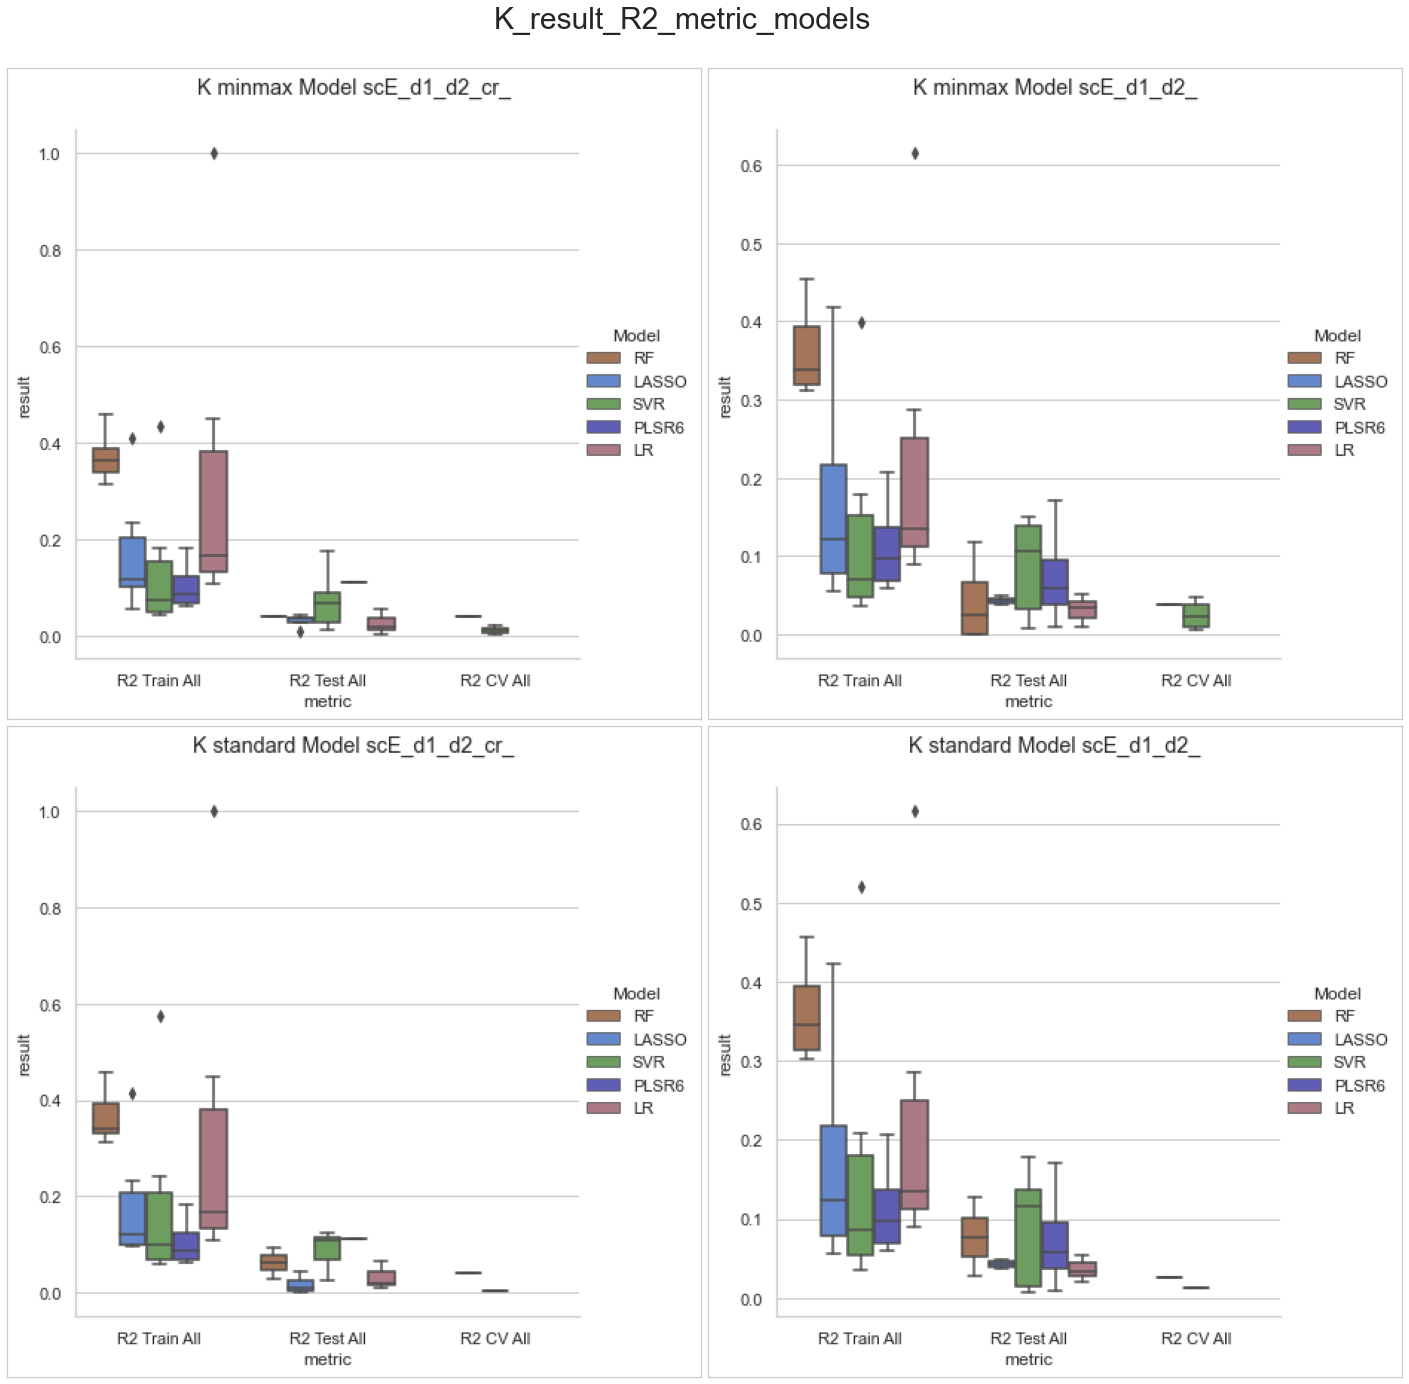

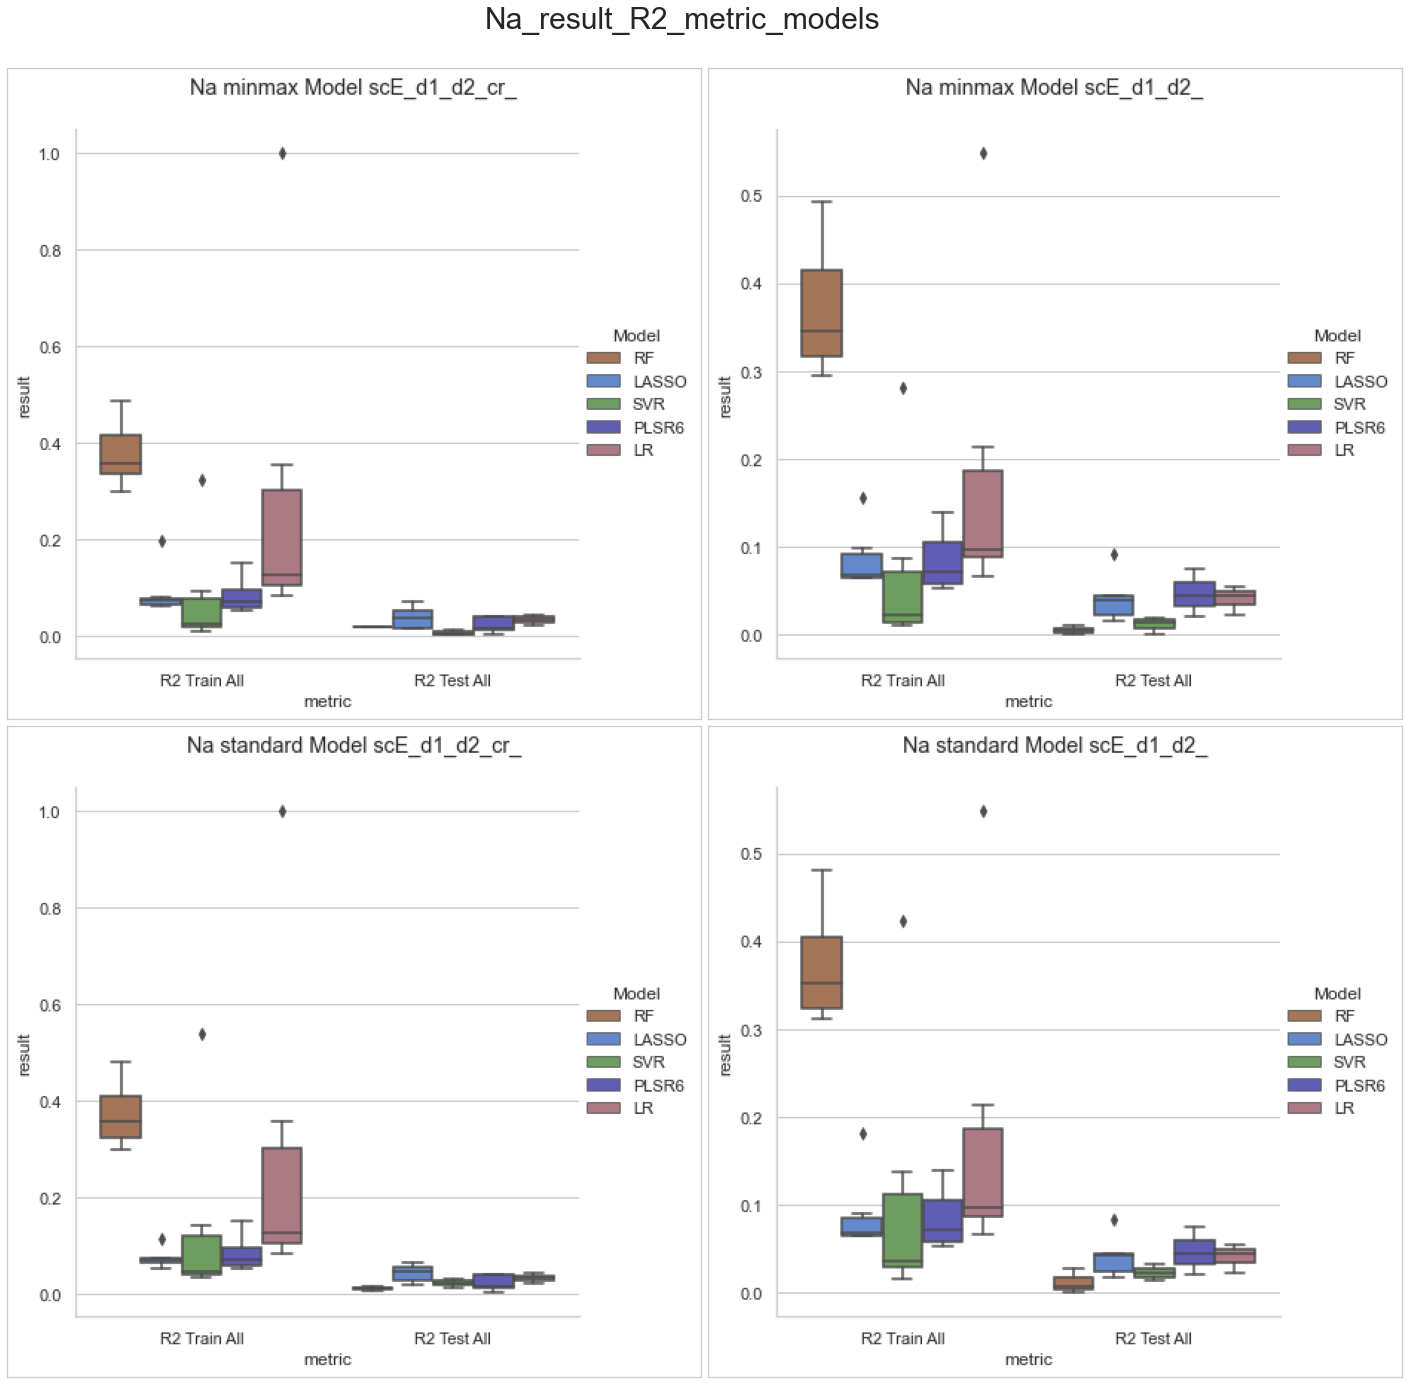

In [61]:
for cols, tt in zip(all_text_columns, all_metrics):
    print(cols)
    print(tt)
    for i in ['Model']:
        i_ = i.lower()

        for property_ in properties:
        #     print(f"property_: {property_}")

            imgs = []
            for scaler in scalers:
        #         print(f"scaler: {scaler}")

                for feature in features:
        #             print(f"feature: {feature}")

                    path = (
                        f'../reports/figures/{cols}/{scaler}/{feature}/' +
                        f'results_as_boxplots_for_{property_}_{i_}s.png'
                    )
                    img = cv2.imread(path)
        #             print(img is None)
                    imgs.append(img)


            fig = plt.figure(figsize=(25, 25))
            fig.suptitle(f'{property_}_result_{tt}_metric_{i_}s', y=0.9, fontsize=30)
            grid = ImageGrid(
                fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                axes_pad=0.1,  # pad between axes in inch.
            )

            for ax, im in zip(grid, imgs):
                # Iterating over the grid returns the Axes.
                ax.imshow(im)
                ax.grid(False)
                ax.set_xticks([])
                ax.set_yticks([])
            plt.title(f'{property_}_result_metrics')
            path = f'../reports/figures/{cols}/summarize_{i_}s/'
            check_path(path)
            plt.savefig(f'{path}/{property_}_result_metrics_{i_}s.png')
            plt.show()
            plt.close()
plt.close('all')

r2_train_all_r2_cv_all_r2_test_all
R2


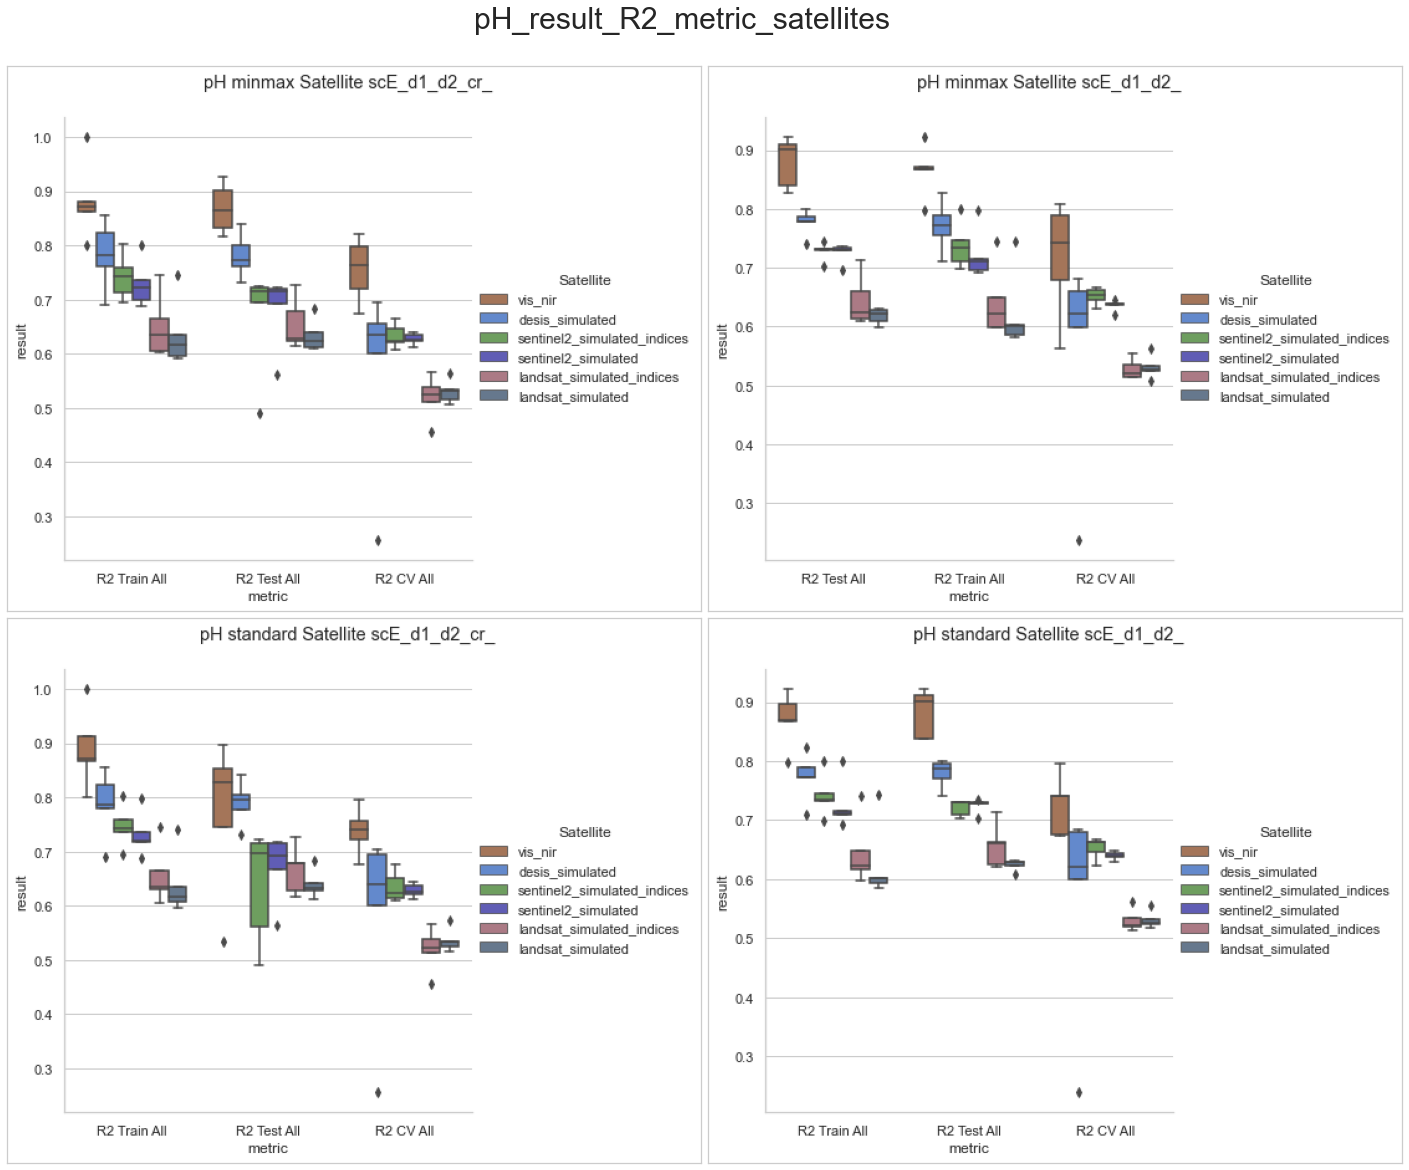

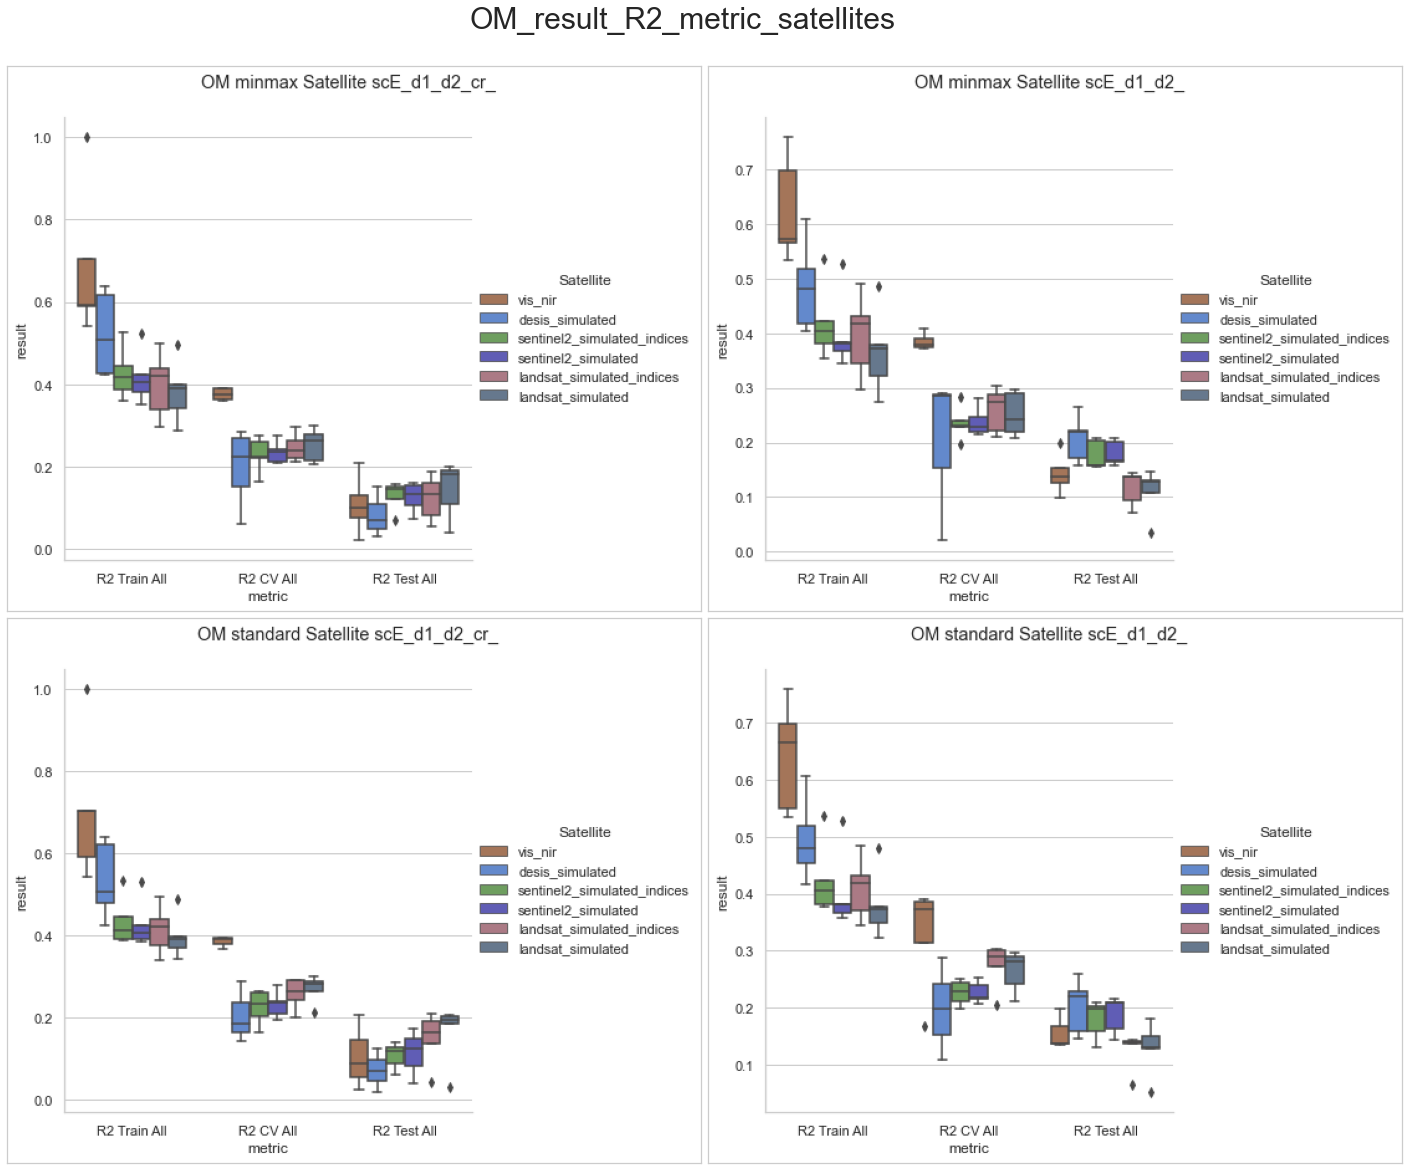

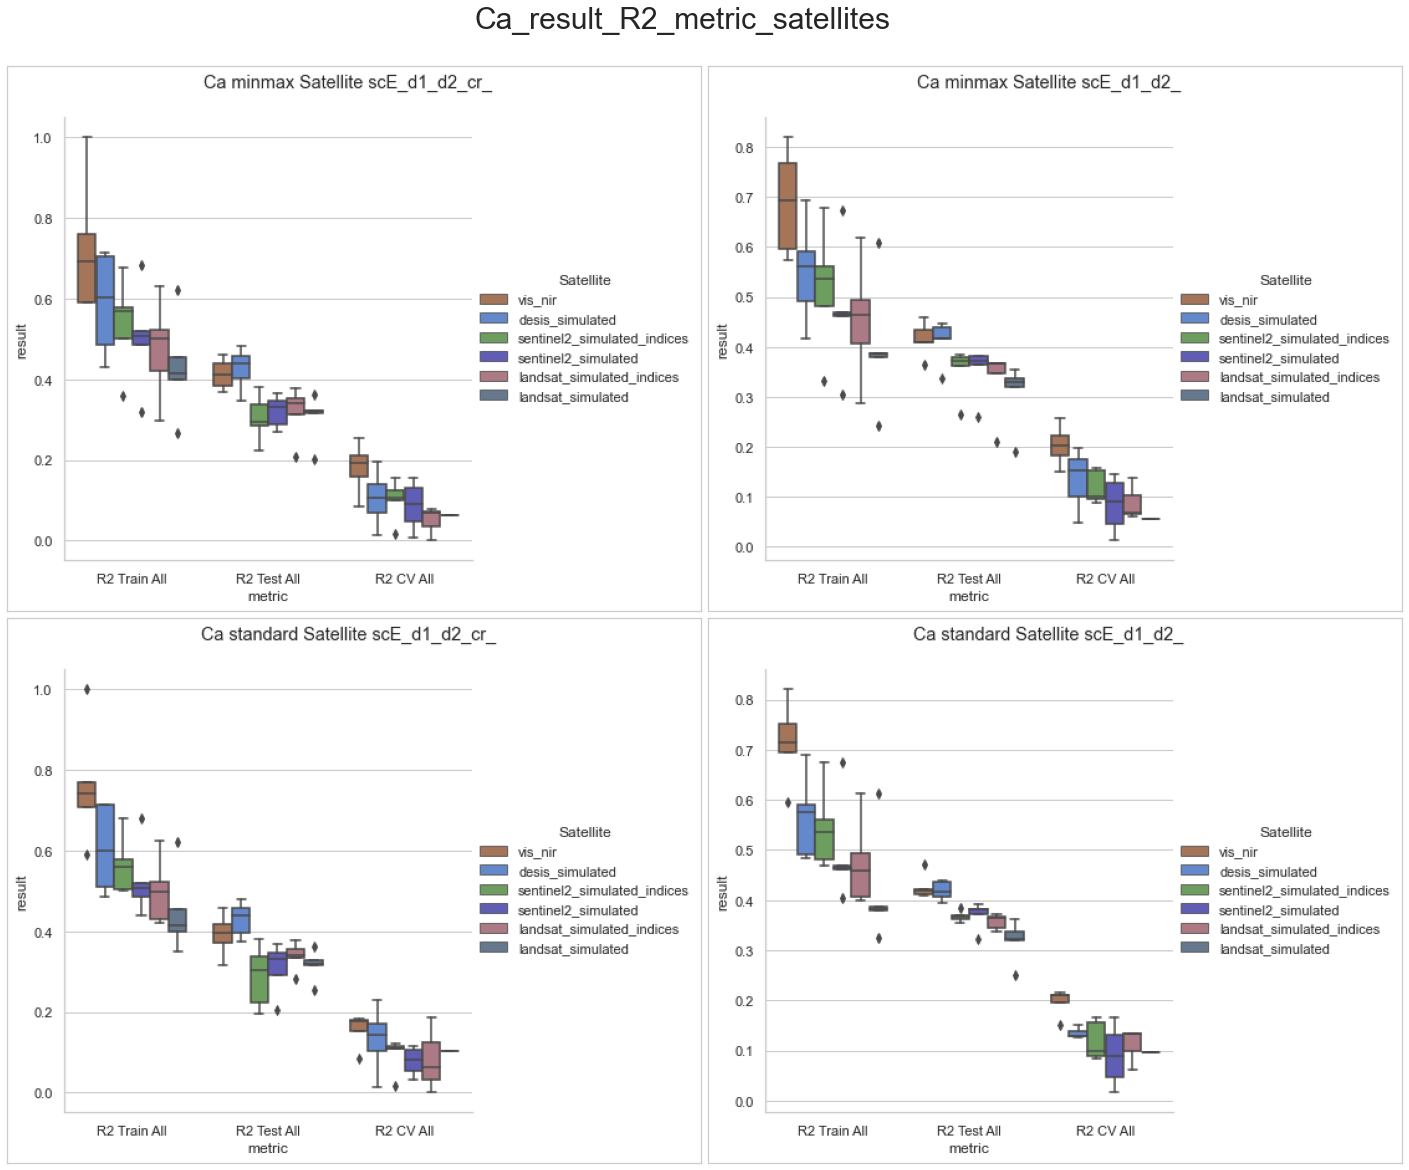

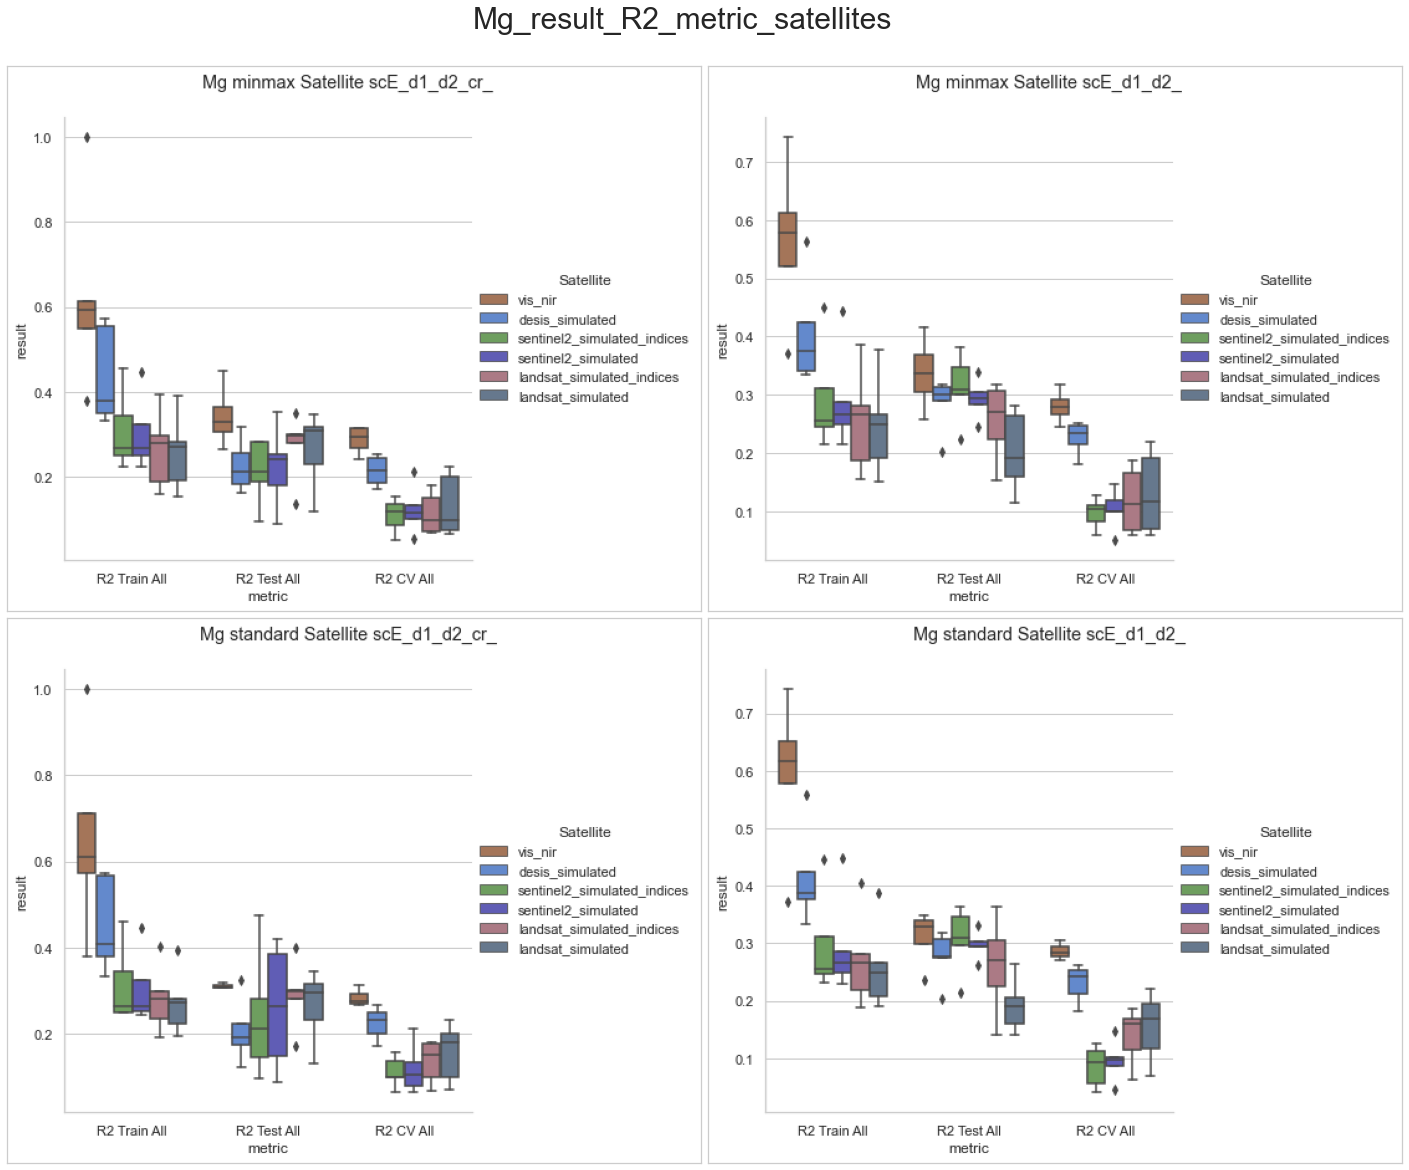

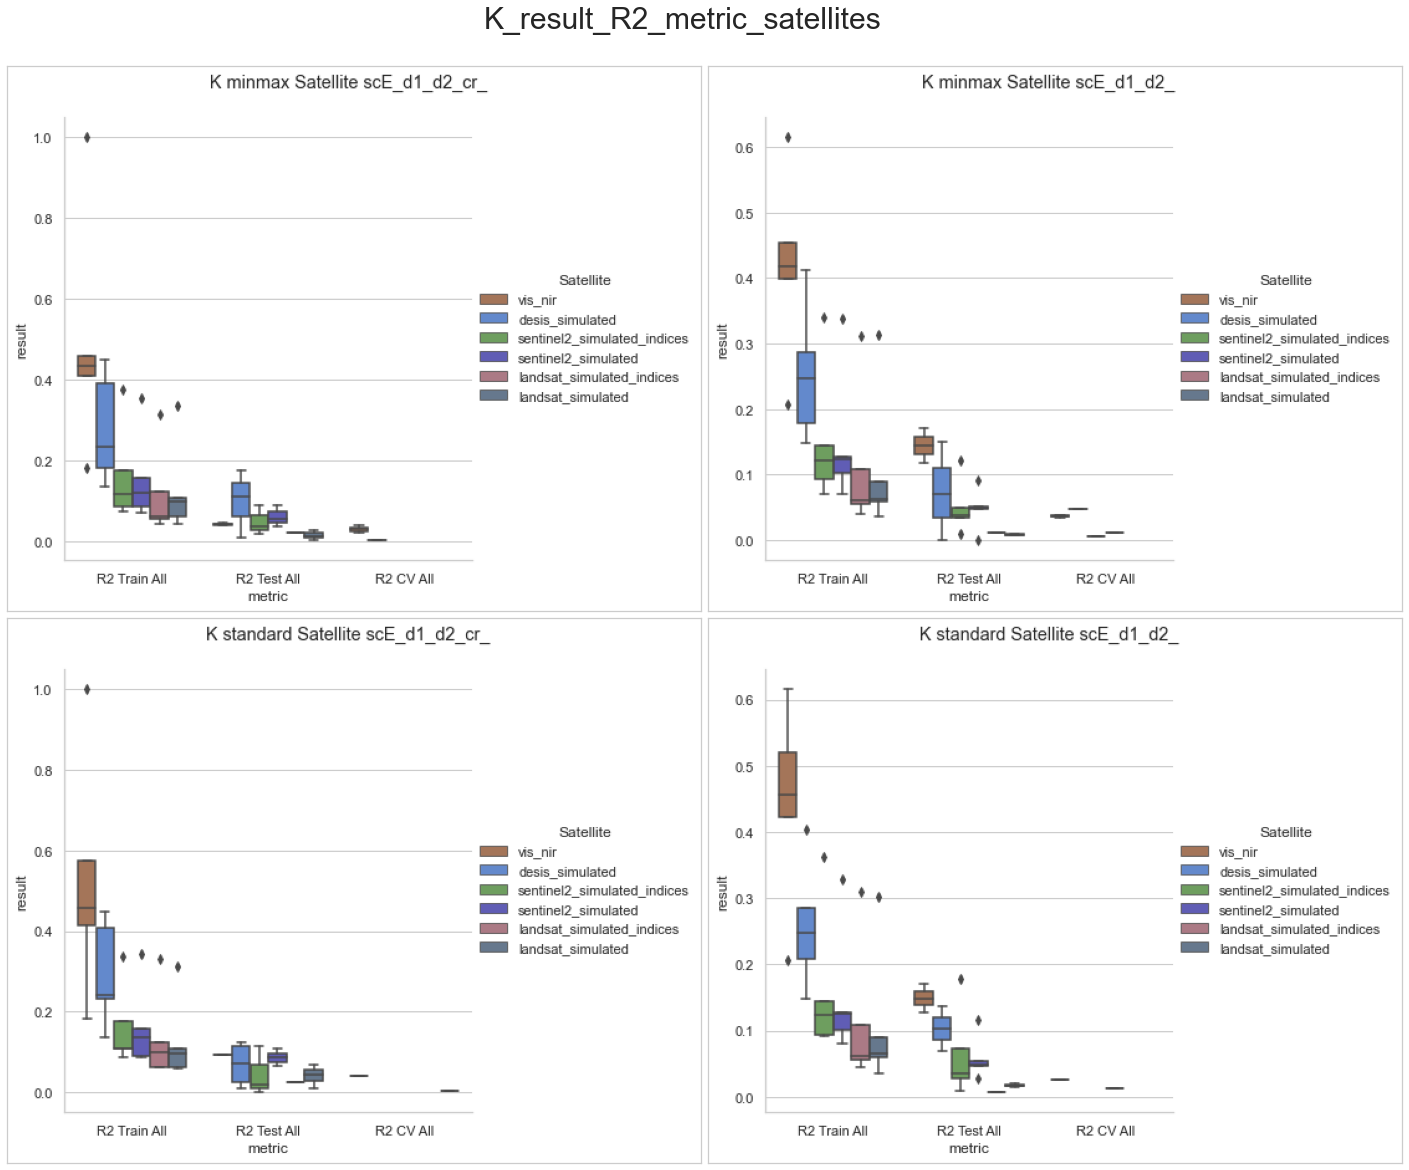

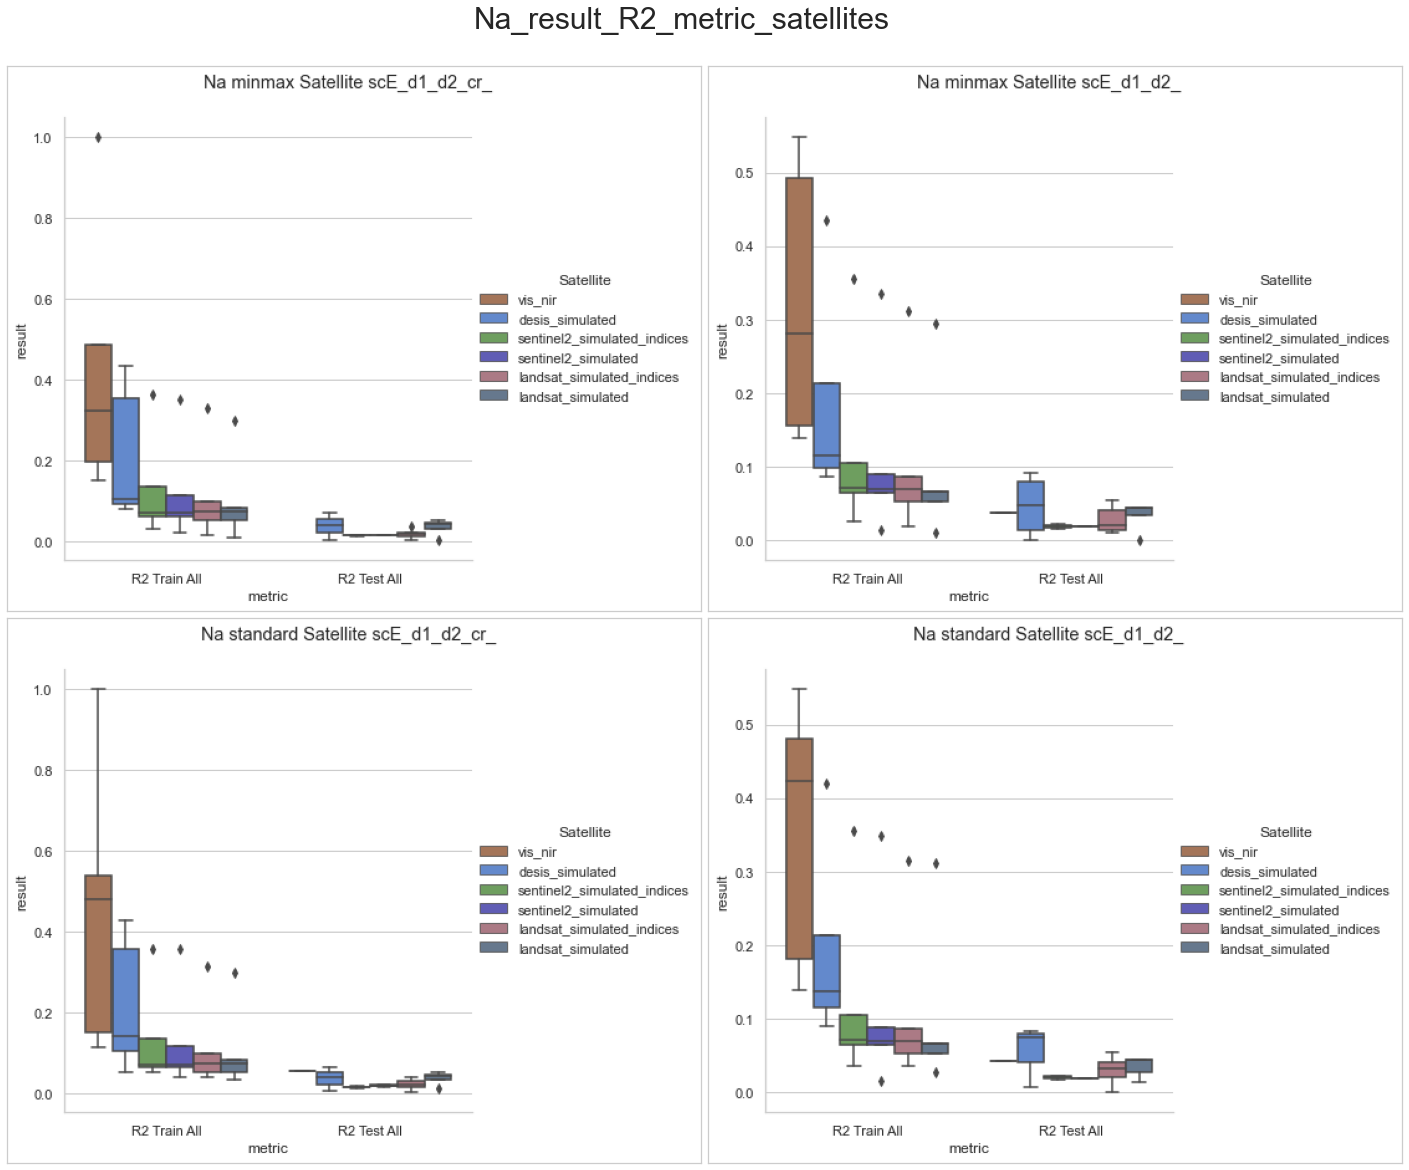

In [62]:
for cols, tt in zip(all_text_columns, all_metrics):
    print(cols)
    print(tt)
    for i in ['Satellite']:
        i_ = i.lower()

        for property_ in properties:
        #     print(f"property_: {property_}")

            imgs = []
            for scaler in scalers:
        #         print(f"scaler: {scaler}")

                for feature in features:
        #             print(f"feature: {feature}")

                    path = (
                        f'../reports/figures/{cols}/{scaler}/{feature}/' +
                        f'results_as_boxplots_for_{property_}_{i_}s.png'
                    )
                    img = cv2.imread(path)
        #             print(img is None)
                    imgs.append(img)


            fig = plt.figure(figsize=(25, 25))
            fig.suptitle(f'{property_}_result_{tt}_metric_{i_}s', y=0.84, fontsize=30)
            grid = ImageGrid(
                fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                axes_pad=0.1,  # pad between axes in inch.
            )

            for ax, im in zip(grid, imgs):
                # Iterating over the grid returns the Axes.
                ax.imshow(im)
                ax.grid(False)
                ax.set_xticks([])
                ax.set_yticks([])
            plt.title(f'{property_}_result_metrics')
            path = f'../reports/figures/{cols}/summarize_{i_}s/'
            check_path(path)
            plt.savefig(f'{path}/{property_}_result_metrics_{i_}s.png')
            plt.show()
            plt.close()
plt.close('all')